# **1.회귀(regression) 예측**

* 수치형 값을 예측(Y의 값이 연속된 수치로 표현)
* 예) 주택 가격 예측, 매출액 예측
* [도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [2]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True) # e표현을 일반 숫자로 변경

In [3]:
# from sklearn.datasets import load_boston

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
dir_path = '/content/drive/MyDrive/Colab Notebooks/Python_AI/TJE_Prof_KKH_230616/4_Machine_Learning/Resources/12_회귀모델_데이터/'
data = pd.read_csv( dir_path +'HousingData.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **컬럼**
속성수 : 13
* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df = data[:].dropna()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

<ipython-input-8-5fdc4024a942>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])


In [9]:
x_train.shape, x_test.shape

((295, 13), (99, 13))

In [10]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
113,0.22212,0.0,10.01,0.0,0.547,6.092,95.4,2.5480,6,432,17.8,396.90,17.09
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8,284,19.7,395.11,13.15
341,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1,284,15.5,394.74,5.49
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34


# **2. 평가 지표**

### **2-1. MSE(Mean Squared Error)**

* ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값

### **2-2. MAE(Mean Absolute Error)**

* $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$
* 예측값과 실제값의 차이에 대한 절대값에 대하여 평균을 낸 값

### **2-3. RMSE(Root Mean Squared Error)**

* $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 뒤 루트를 씌운 값

In [11]:
pred = np.array([3,4,5])
actual = np.array([1,2,3])

In [12]:
def my_mse(pred, actual): # 4.0
  return((pred - actual)**2).mean()

In [13]:
my_mse(pred, actual)

4.0

In [14]:
def my_mae(pred, actual): # 2.0
  return np.abs(pred - actual).mean()

In [15]:
my_mae(pred, actual)

2.0

In [16]:
def my_rmse(pred, actual): # 2.0
  return np.sqrt(my_mse(pred, actual))

In [17]:
my_rmse(pred, actual)

2.0

### **2-4. sklearn의 평가지표 활용**

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [20]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

# **3. 모델별 성능 확인을 위한 함수**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

# 4. LinearRegression

* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression(n_jobs=-1)

In [24]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
113,0.22212,0.0,10.01,0.0,0.547,6.092,95.4,2.5480,6,432,17.8,396.90,17.09
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8,284,19.7,395.11,13.15
341,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1,284,15.5,394.74,5.49
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
66,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4,337,16.1,396.90,10.24
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
19,0.72580,0.0,8.14,0.0,0.538,5.727,69.5,3.7965,4,307,21.0,390.95,11.28


In [25]:
# 학습
model.fit(x_train, y_train)
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

LinearRegression(n_jobs=-1)

In [26]:
pred = model.predict(x_test)

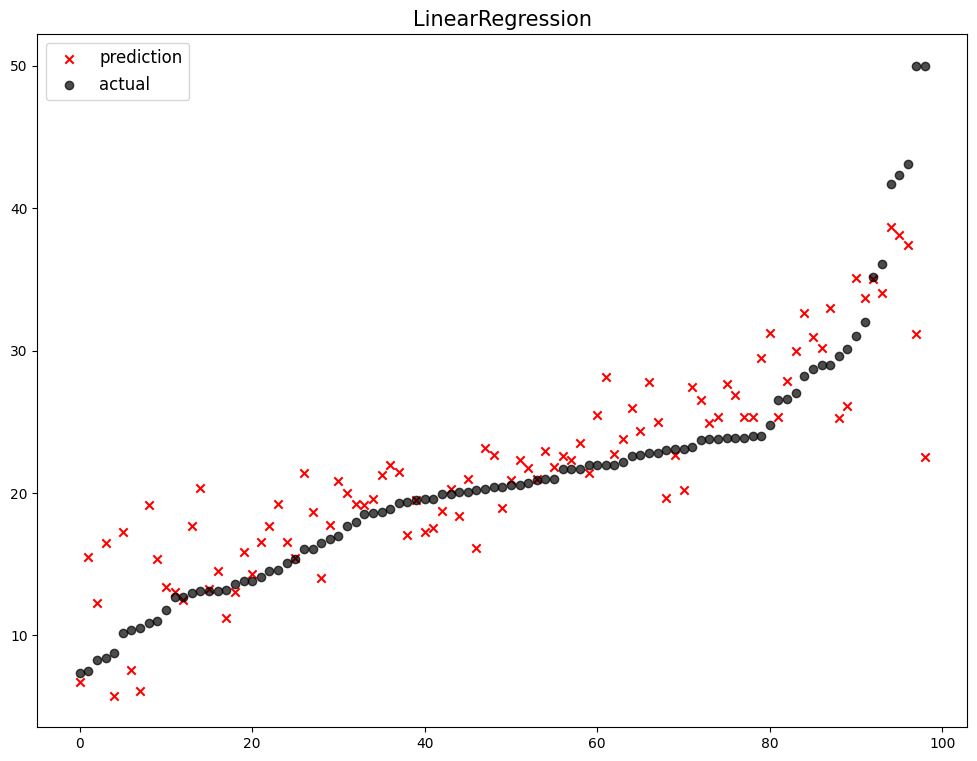

              model        mse
0  LinearRegression  21.446034


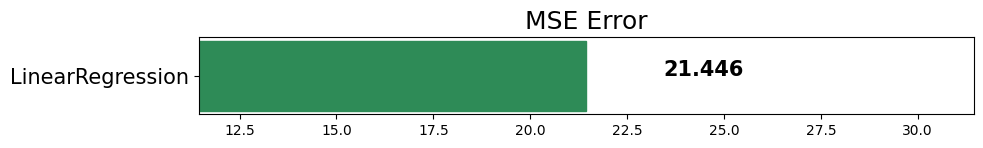

In [27]:
mse_eval('LinearRegression', pred, y_test)

# **5. 규제(Regularization)**

* 학습이 과대적합 되는 것을 방지하고자 일종의 penalty를 부여하는 것
* L2 규제(릿지, Ridge)
  - 각 가중치 제곱의 합에 규제 강도 λ를 곱함
  - λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가함(규제를 중요시 하지 않음)
  - $Error=MSE+αw^2$
* L1 규제(라쏘, Lasso)
  - 가중치의 제곱의 합이 아닌 가중치의 합을 더한 값에 규제 강도 λ를 곱하여 오차에 더함
  - 어떤 가중치(w)는 실제로 0이됨. 즉 모델에서 완전히 제외되는 특성이 생김
  - $Error=MSE+α|w|$

> L2 규제가 L1 규제에 비해 안정적이라 일반적으로 L2 규제가 더 많이 사용

* [유튜브-릿지& 라쏘 회귀 (다중 회귀)](https://www.youtube.com/watch?v=MSddyk7Hsxc)

### **5-1. 릿지(Ridge)**

In [28]:
from sklearn.linear_model import Ridge

In [29]:
# 값이 클수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

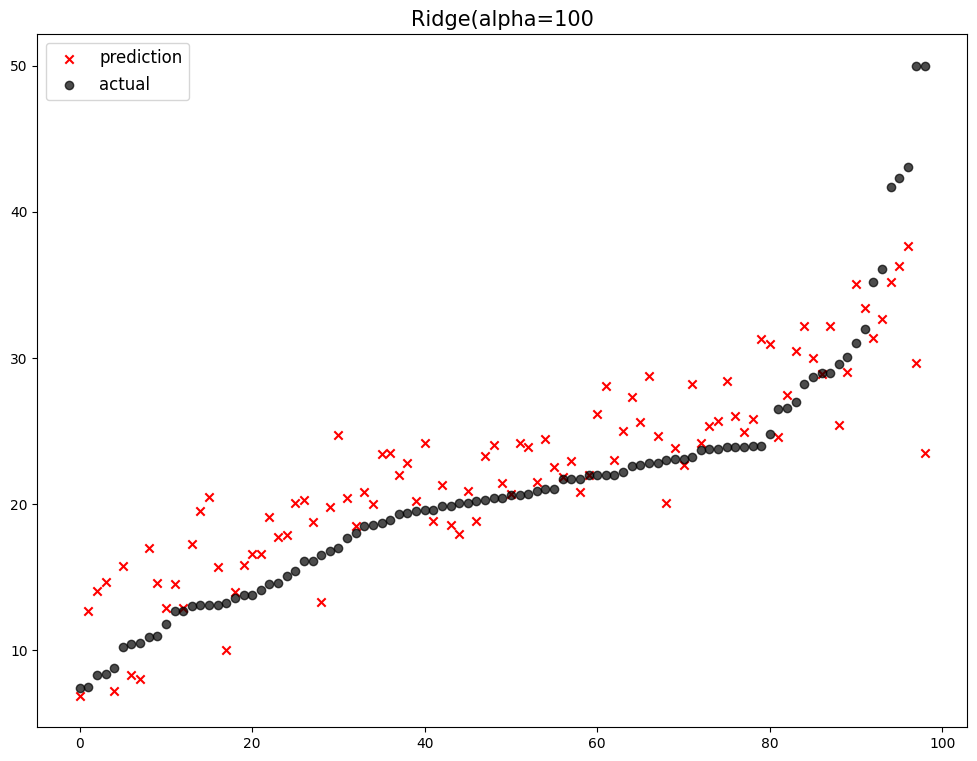

              model        mse
0   Ridge(alpha=100  23.302588
1  LinearRegression  21.446034


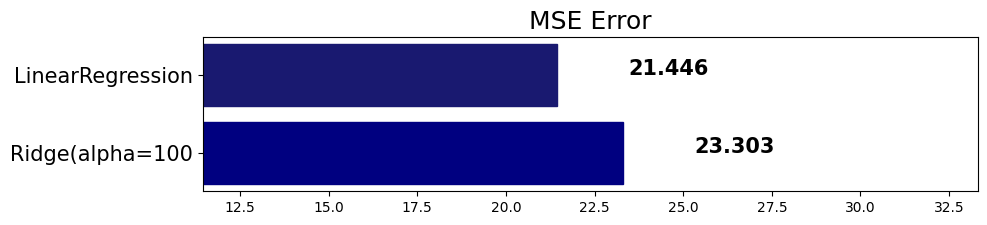

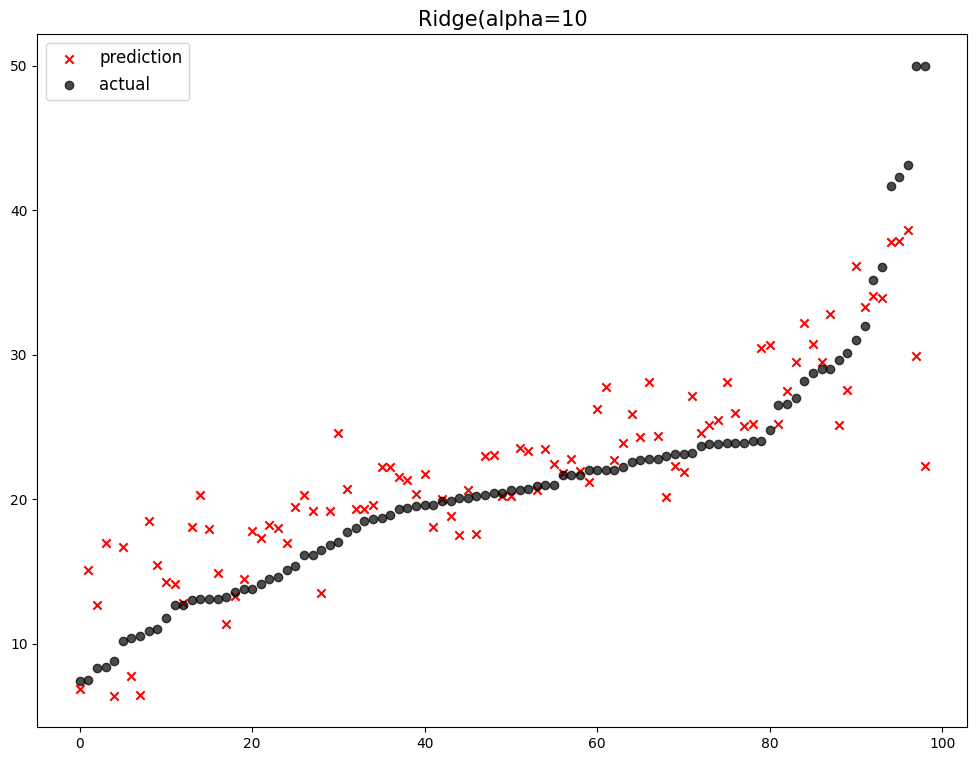

              model        mse
0   Ridge(alpha=100  23.302588
1    Ridge(alpha=10  22.757505
2  LinearRegression  21.446034


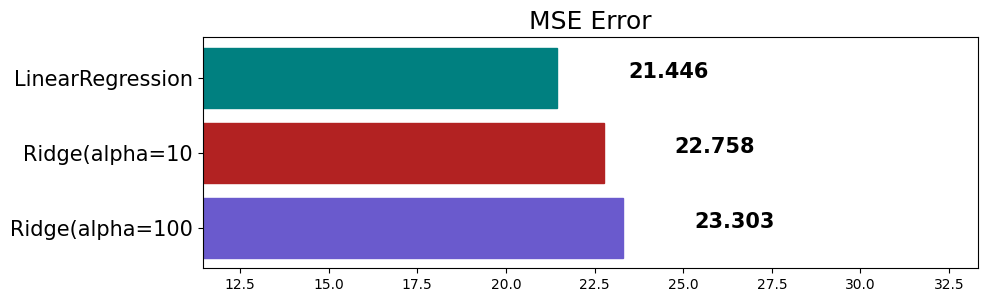

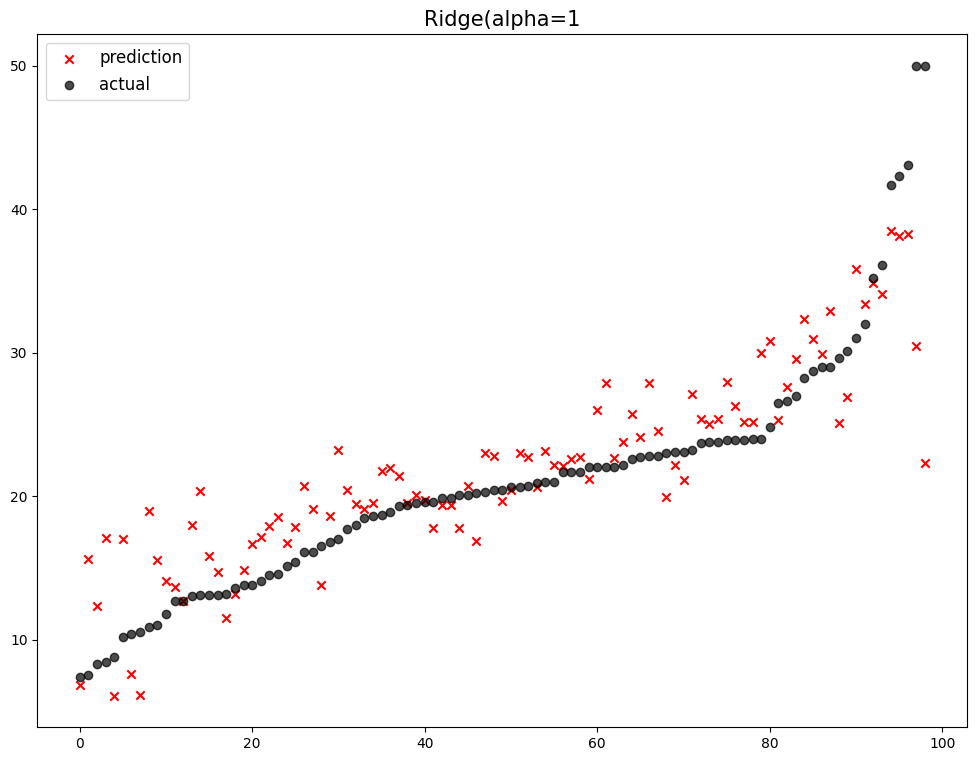

              model        mse
0   Ridge(alpha=100  23.302588
1    Ridge(alpha=10  22.757505
2     Ridge(alpha=1  21.975229
3  LinearRegression  21.446034


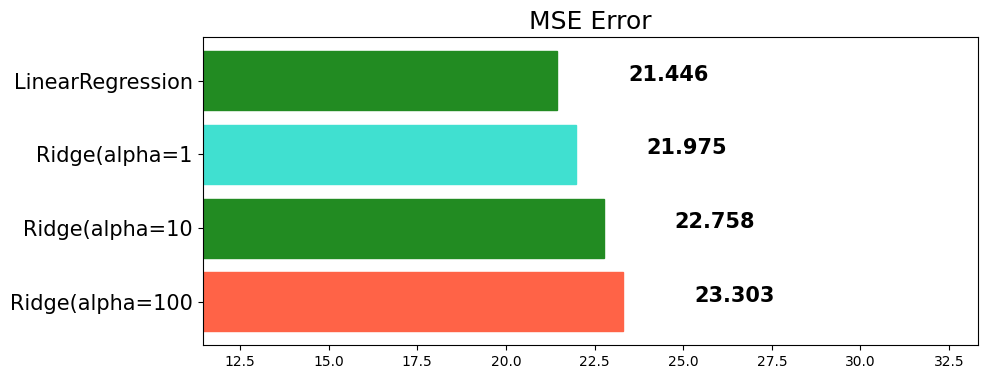

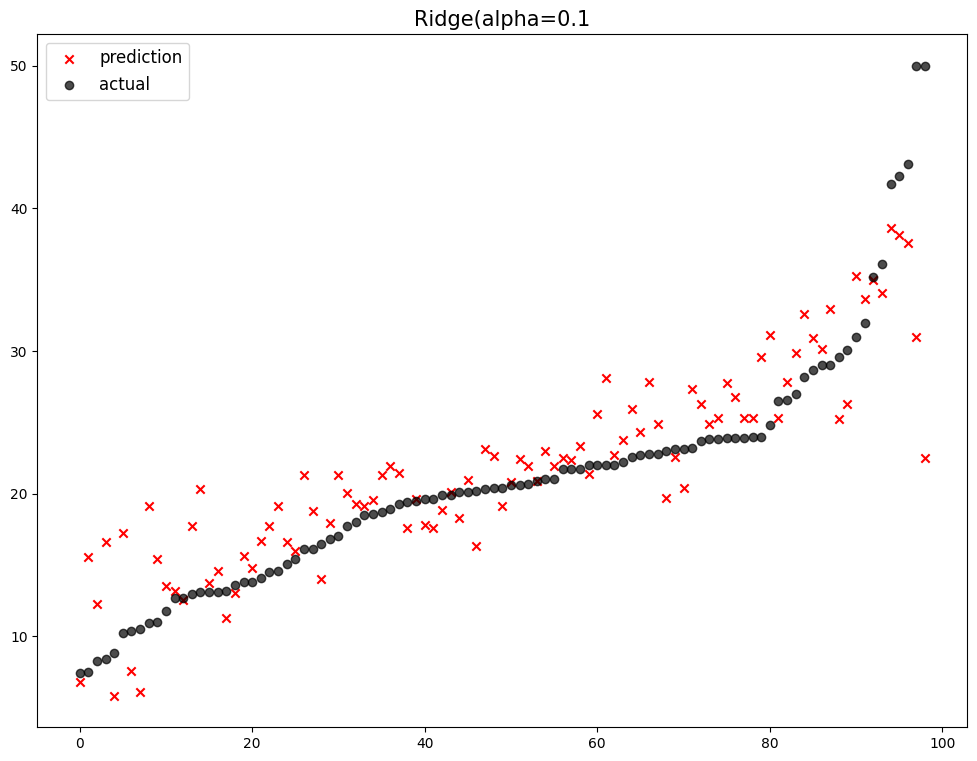

              model        mse
0   Ridge(alpha=100  23.302588
1    Ridge(alpha=10  22.757505
2     Ridge(alpha=1  21.975229
3   Ridge(alpha=0.1  21.467921
4  LinearRegression  21.446034


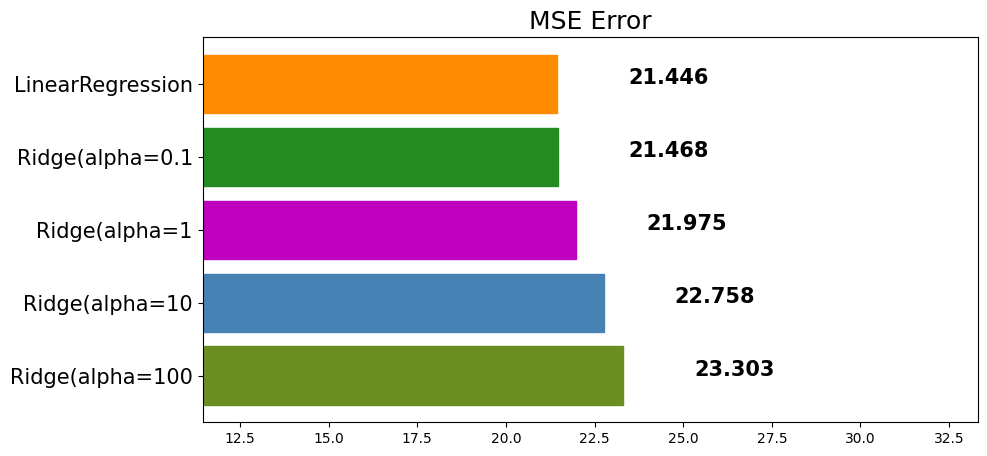

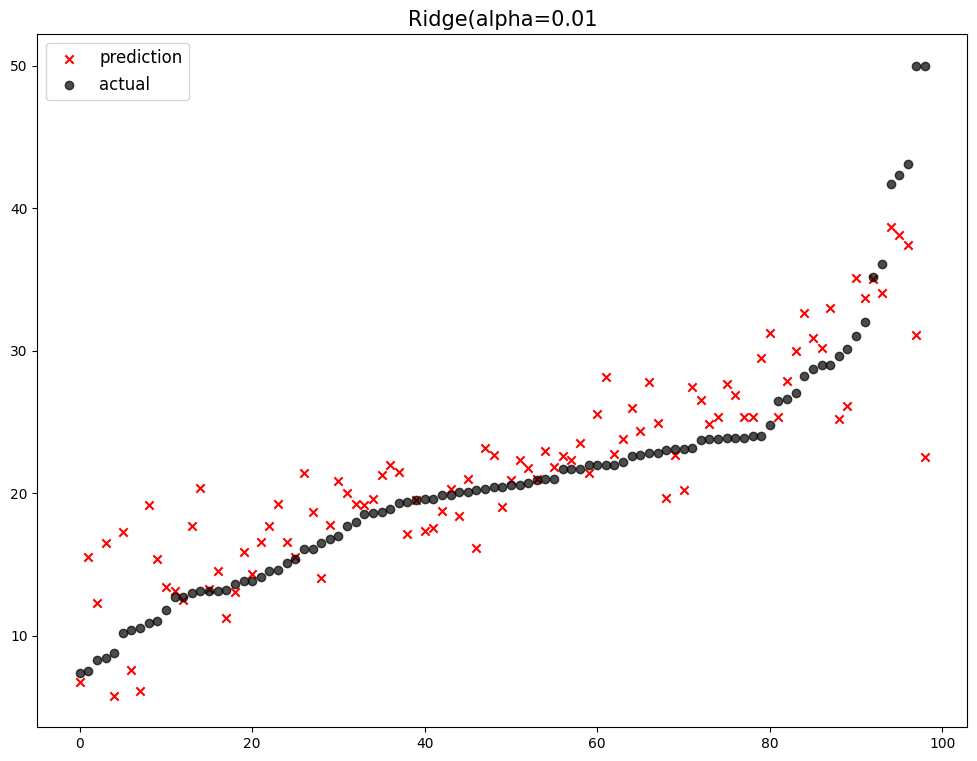

              model        mse
0   Ridge(alpha=100  23.302588
1    Ridge(alpha=10  22.757505
2     Ridge(alpha=1  21.975229
3   Ridge(alpha=0.1  21.467921
4  Ridge(alpha=0.01  21.446143
5  LinearRegression  21.446034


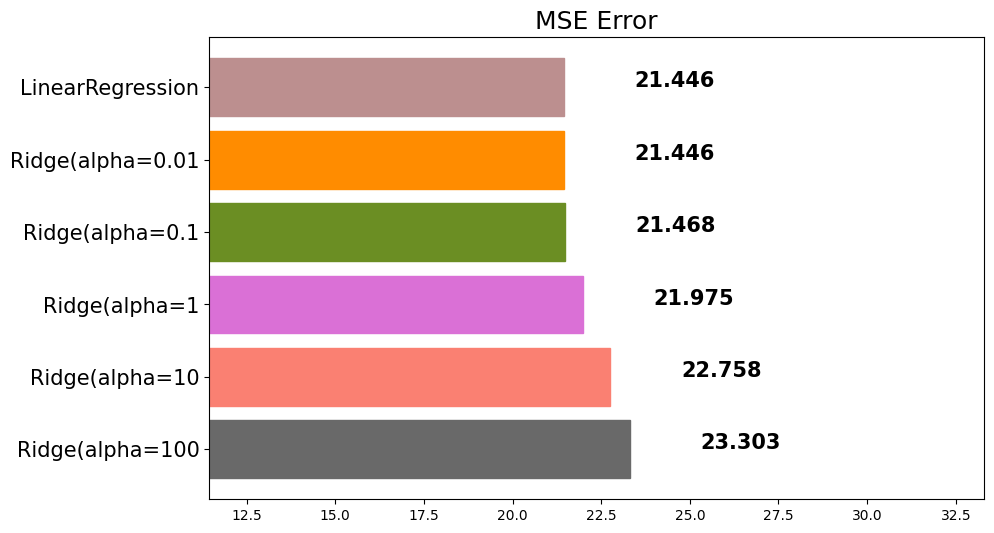

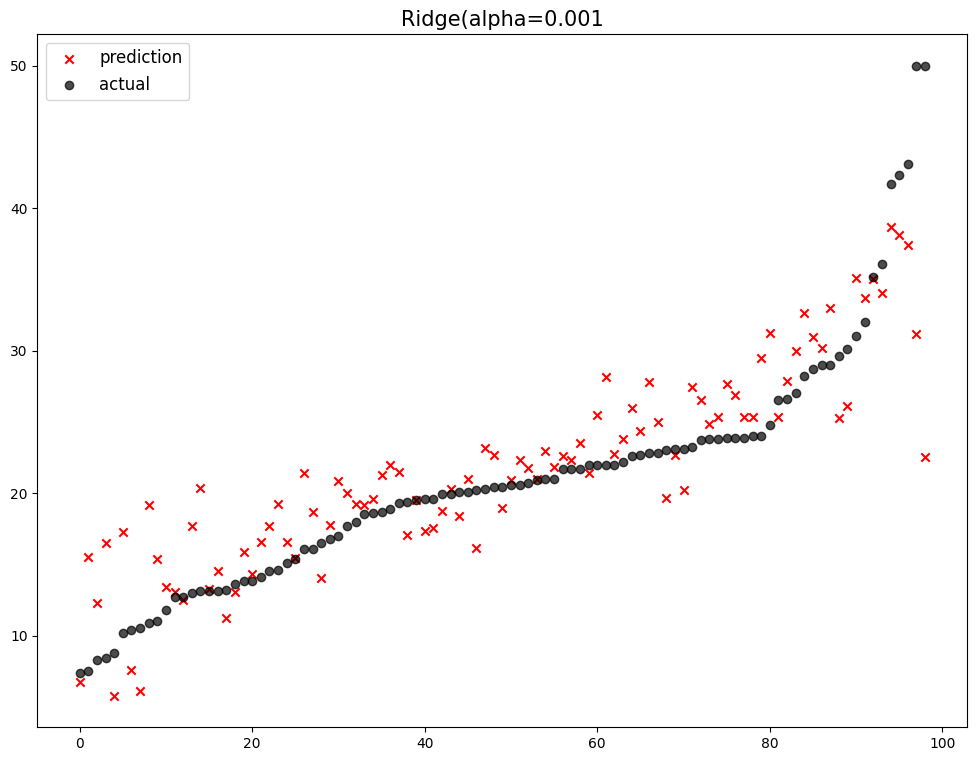

               model        mse
0    Ridge(alpha=100  23.302588
1     Ridge(alpha=10  22.757505
2      Ridge(alpha=1  21.975229
3    Ridge(alpha=0.1  21.467921
4   Ridge(alpha=0.01  21.446143
5   LinearRegression  21.446034
6  Ridge(alpha=0.001  21.446018


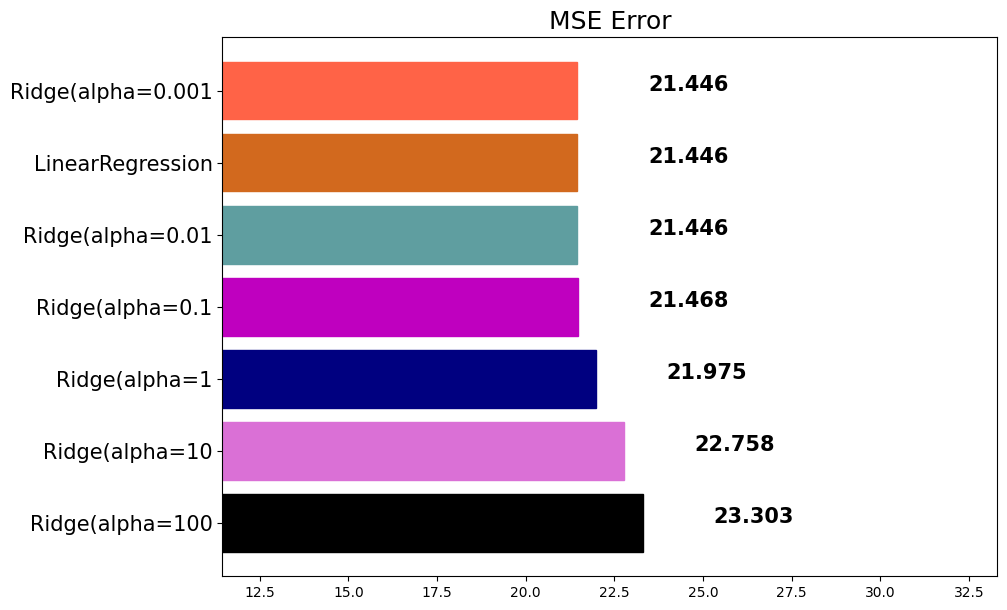

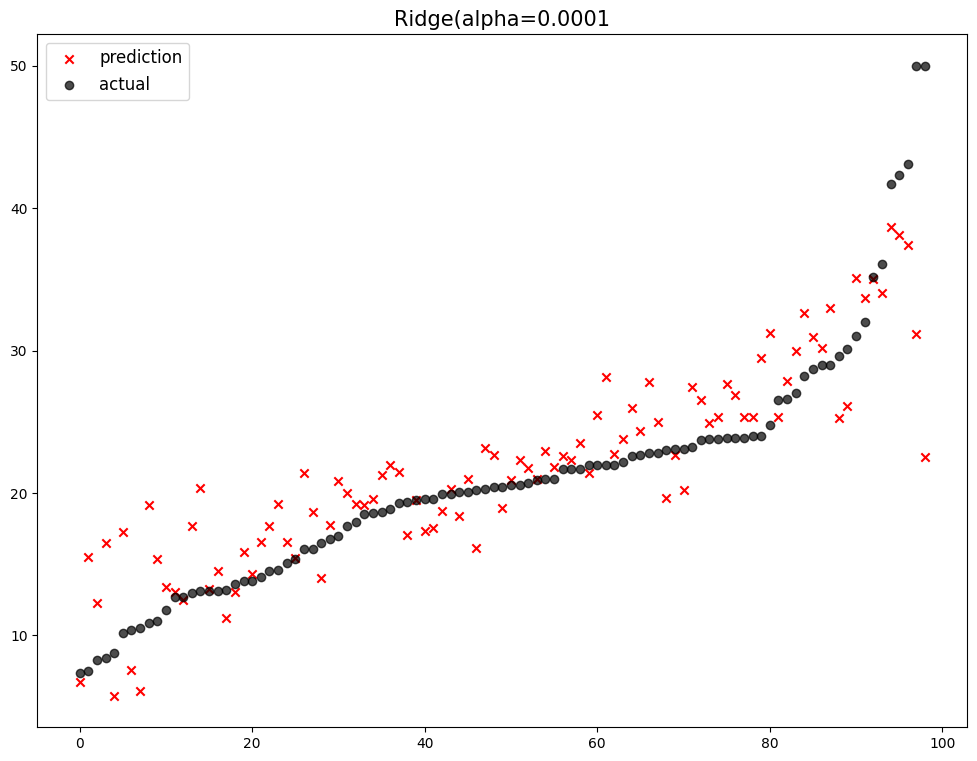

                model        mse
0     Ridge(alpha=100  23.302588
1      Ridge(alpha=10  22.757505
2       Ridge(alpha=1  21.975229
3     Ridge(alpha=0.1  21.467921
4    Ridge(alpha=0.01  21.446143
5    LinearRegression  21.446034
6  Ridge(alpha=0.0001  21.446032
7   Ridge(alpha=0.001  21.446018


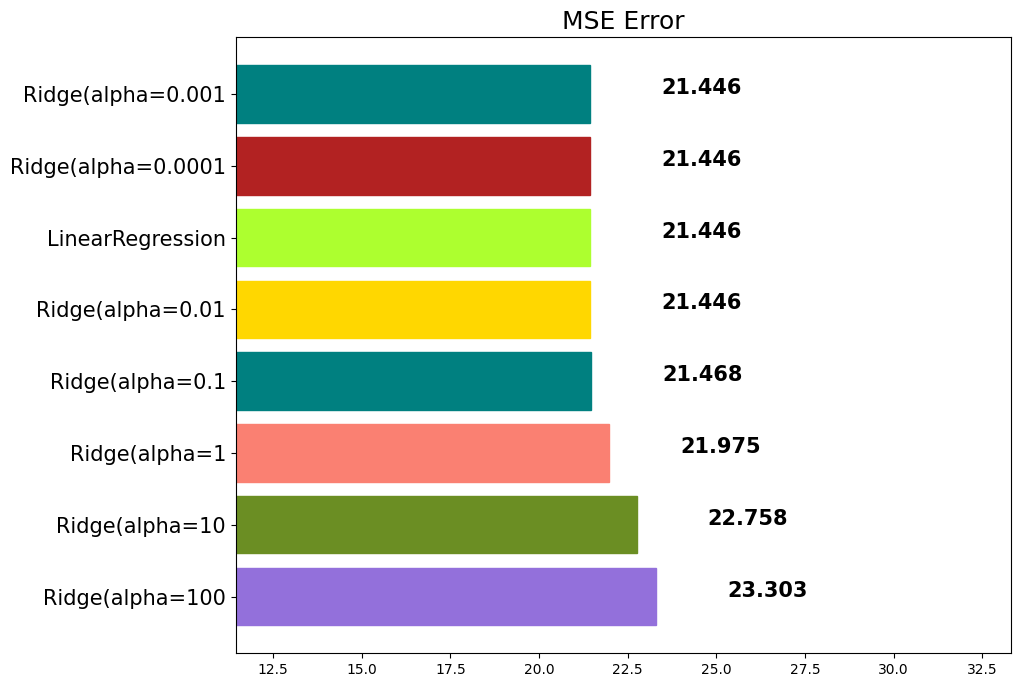

In [30]:
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train, y_train)
  pred = ridge.predict(x_test)
  mse_eval('Ridge(alpha={}'.format(alpha), pred, y_test)

In [31]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [32]:
ridge.coef_

array([ -0.1194122 ,   0.04326351,   0.04905786,   1.02728587,
       -18.79010559,   4.76802769,  -0.01723381,  -1.39295582,
         0.30647168,  -0.01397577,  -1.00446894,   0.00872404,
        -0.35370471])

In [33]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

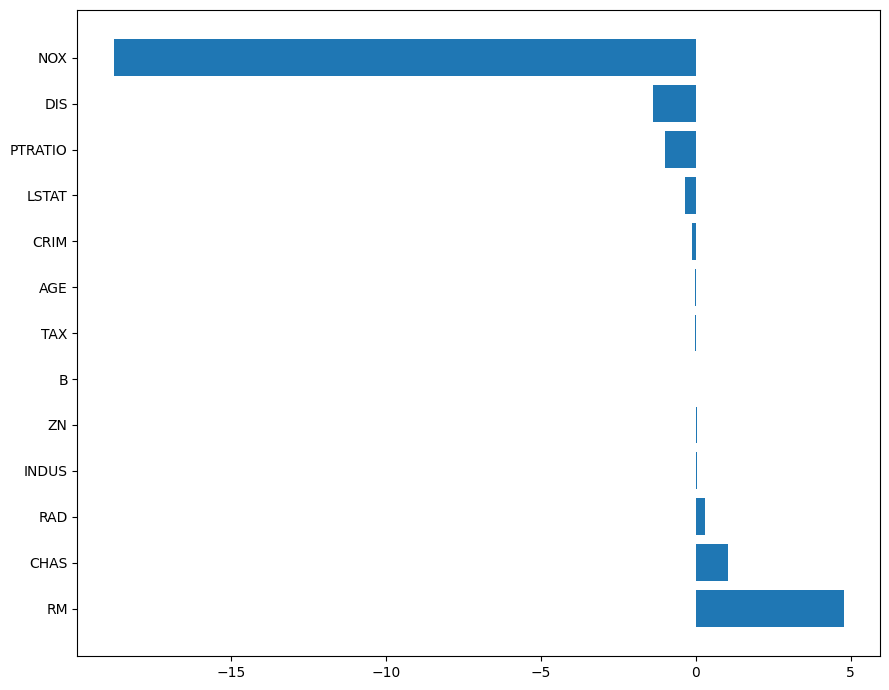

In [34]:
plot_coef(x_train.columns, ridge.coef_)

In [35]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

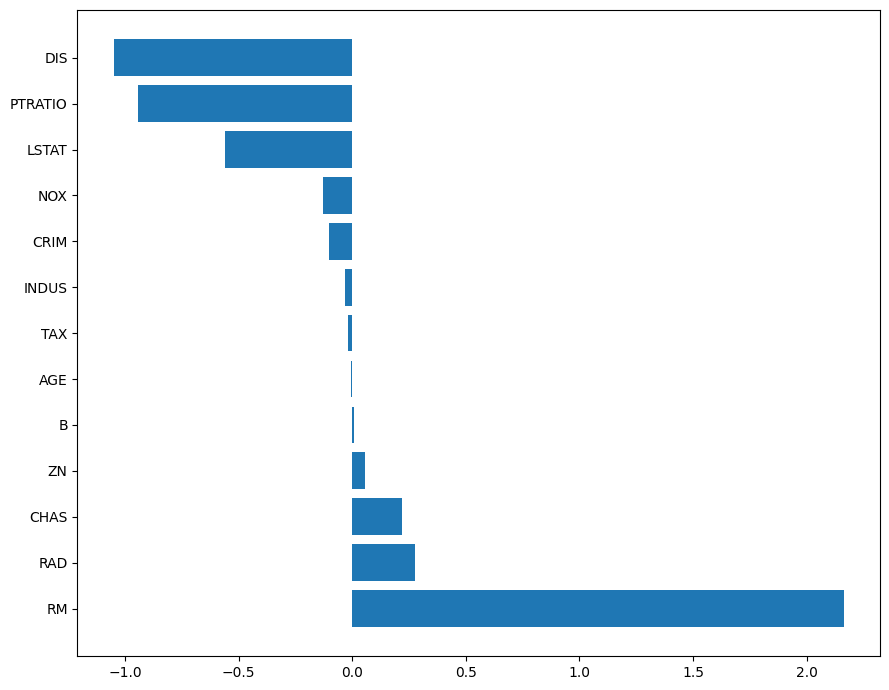

In [36]:
plot_coef(x_train.columns, ridge_100.coef_)

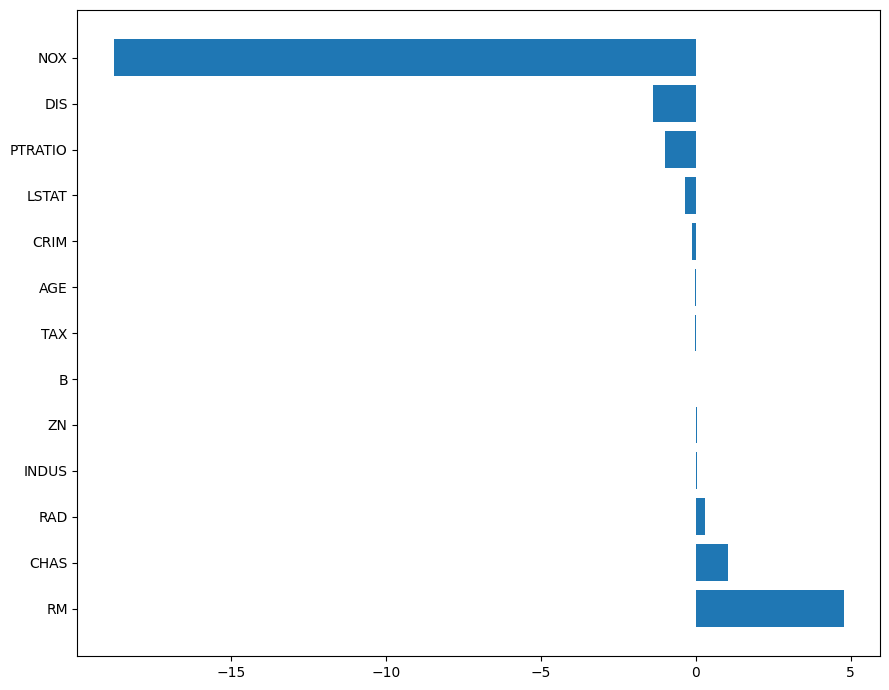

In [37]:
plot_coef(x_train.columns, ridge_001.coef_)

### **5-2. 라쏘(Lasso)**

In [38]:
from sklearn.linear_model import Lasso

In [39]:
# 값이 클수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

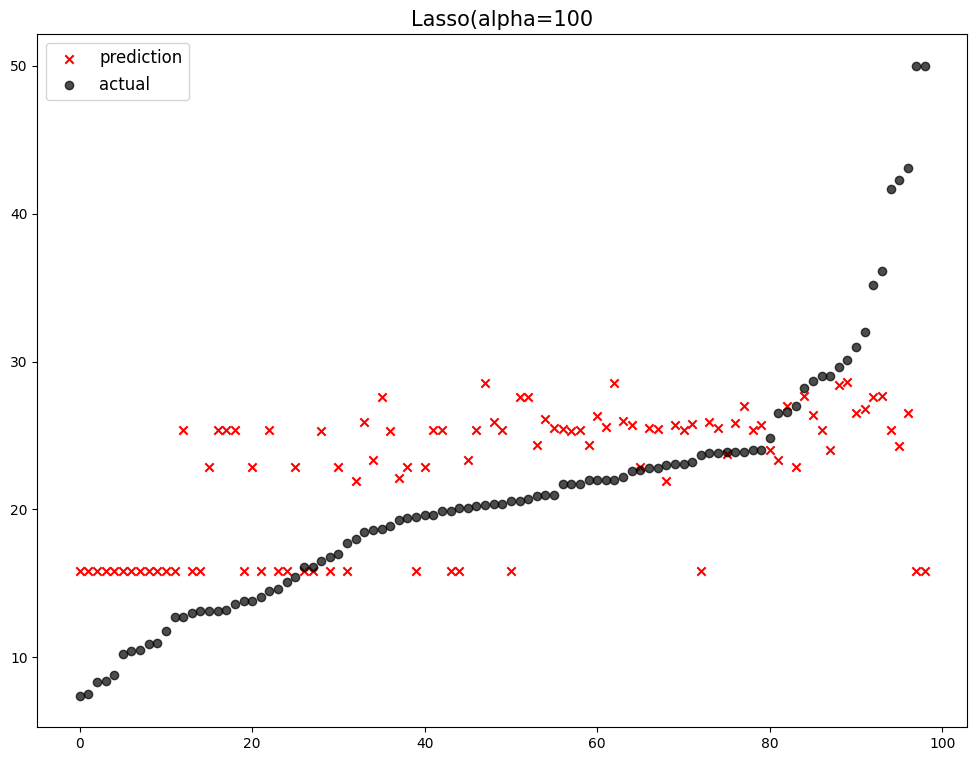

                model        mse
0     Lasso(alpha=100  60.281090
1     Ridge(alpha=100  23.302588
2      Ridge(alpha=10  22.757505
3       Ridge(alpha=1  21.975229
4     Ridge(alpha=0.1  21.467921
5    Ridge(alpha=0.01  21.446143
6    LinearRegression  21.446034
7  Ridge(alpha=0.0001  21.446032
8   Ridge(alpha=0.001  21.446018


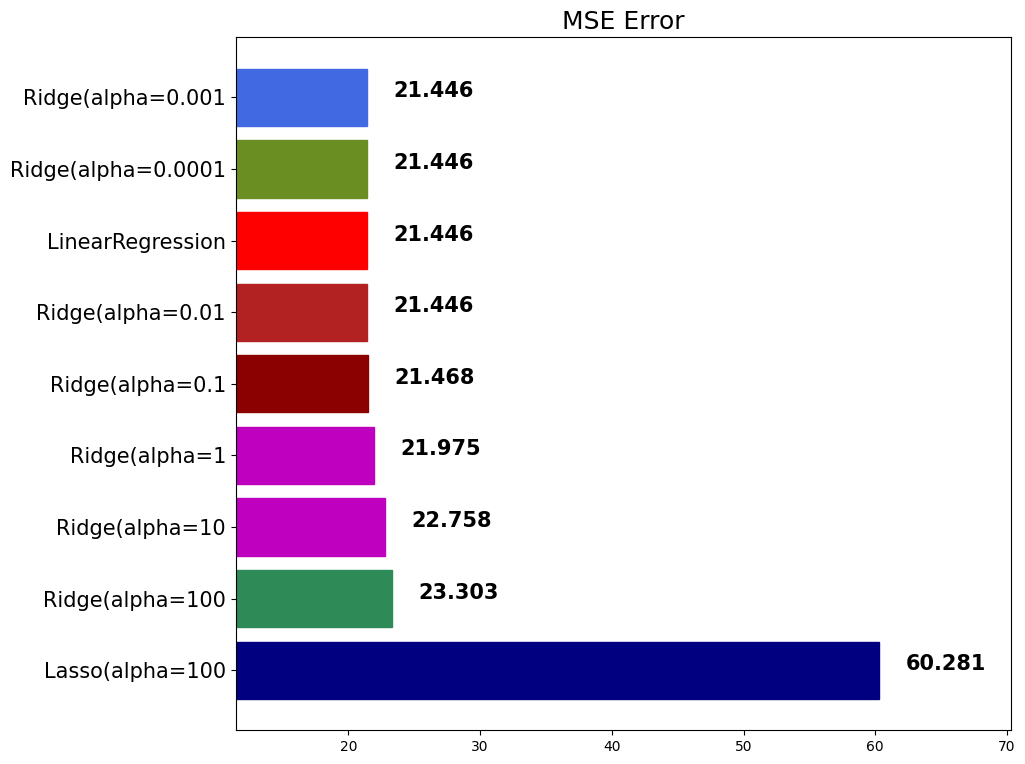

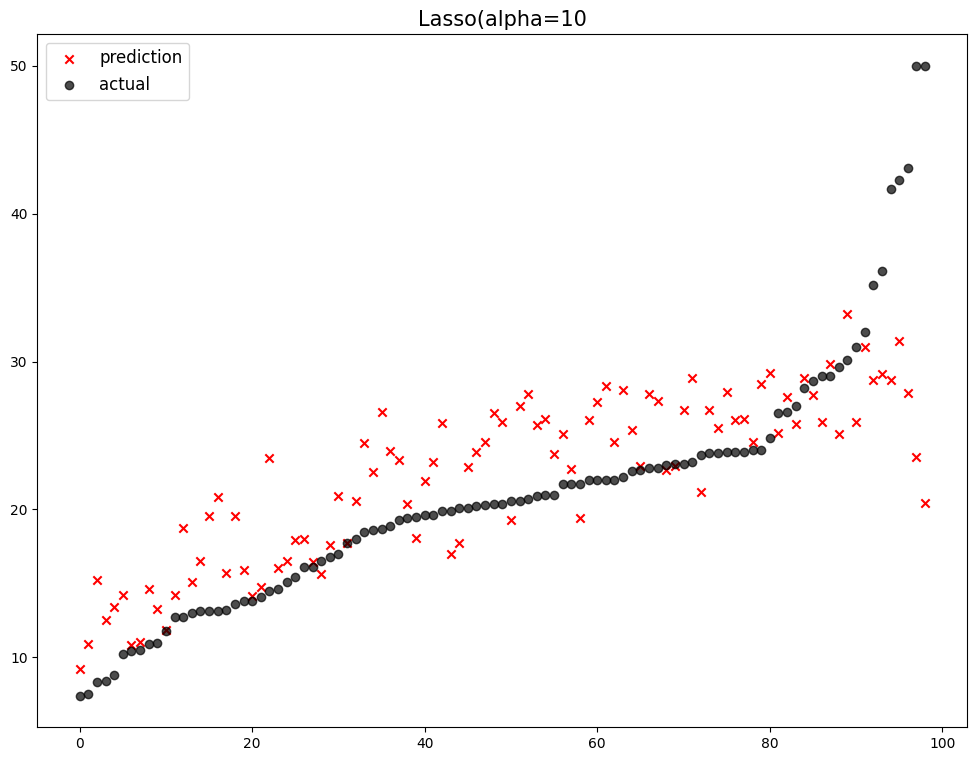

                model        mse
0     Lasso(alpha=100  60.281090
1      Lasso(alpha=10  35.591429
2     Ridge(alpha=100  23.302588
3      Ridge(alpha=10  22.757505
4       Ridge(alpha=1  21.975229
5     Ridge(alpha=0.1  21.467921
6    Ridge(alpha=0.01  21.446143
7    LinearRegression  21.446034
8  Ridge(alpha=0.0001  21.446032
9   Ridge(alpha=0.001  21.446018


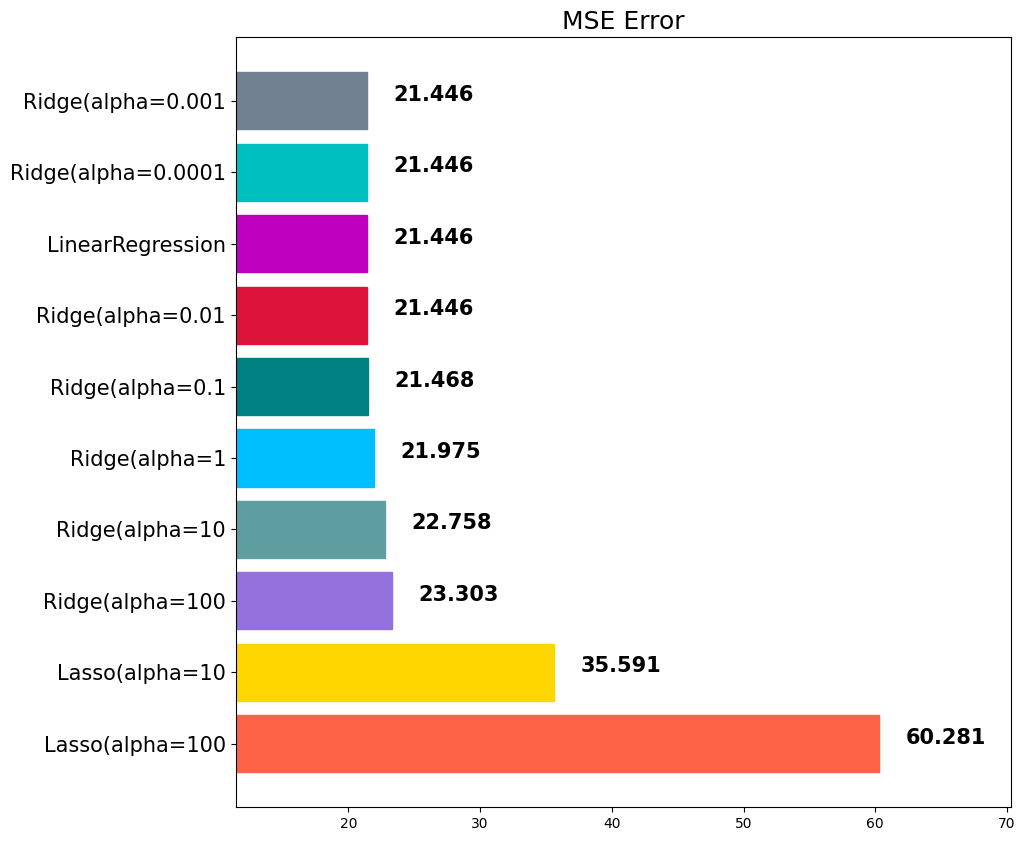

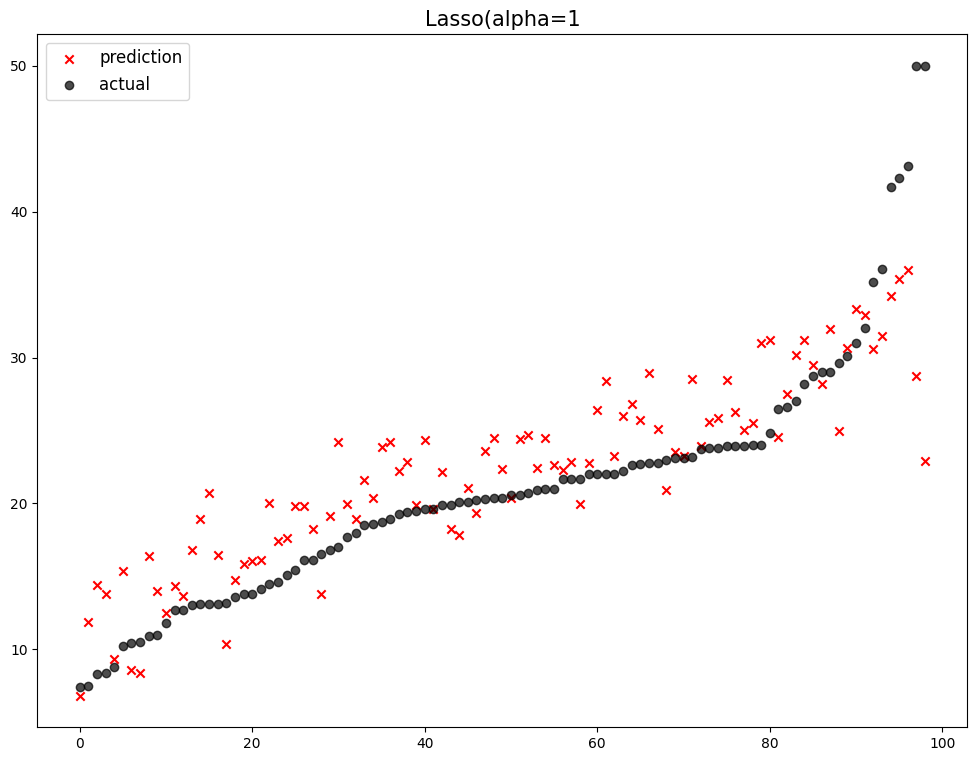

                 model        mse
0      Lasso(alpha=100  60.281090
1       Lasso(alpha=10  35.591429
2        Lasso(alpha=1  24.430407
3      Ridge(alpha=100  23.302588
4       Ridge(alpha=10  22.757505
5        Ridge(alpha=1  21.975229
6      Ridge(alpha=0.1  21.467921
7     Ridge(alpha=0.01  21.446143
8     LinearRegression  21.446034
9   Ridge(alpha=0.0001  21.446032
10   Ridge(alpha=0.001  21.446018


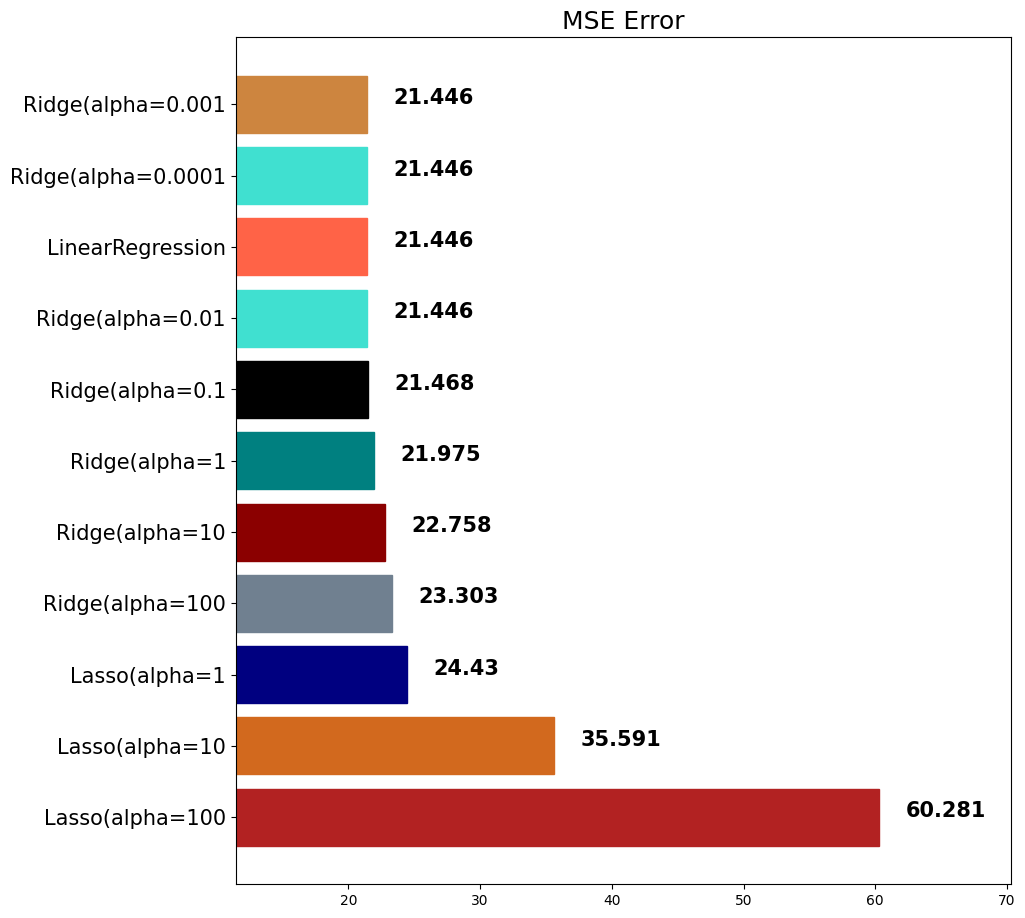

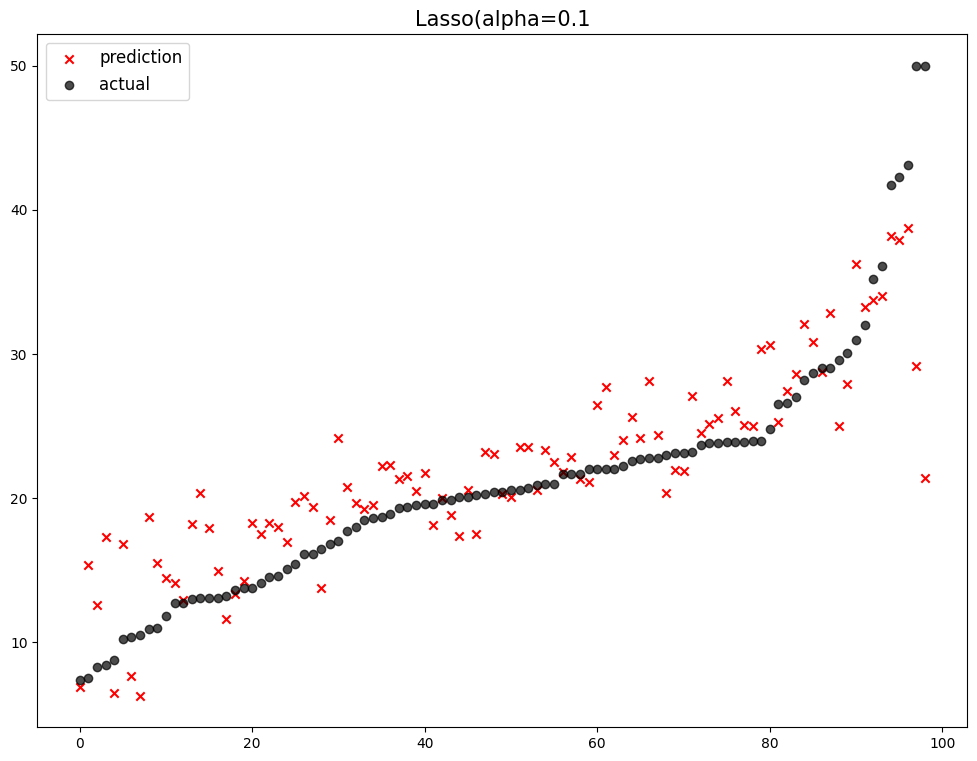

                 model        mse
0      Lasso(alpha=100  60.281090
1       Lasso(alpha=10  35.591429
2        Lasso(alpha=1  24.430407
3      Lasso(alpha=0.1  23.734392
4      Ridge(alpha=100  23.302588
5       Ridge(alpha=10  22.757505
6        Ridge(alpha=1  21.975229
7      Ridge(alpha=0.1  21.467921
8     Ridge(alpha=0.01  21.446143
9     LinearRegression  21.446034
10  Ridge(alpha=0.0001  21.446032
11   Ridge(alpha=0.001  21.446018


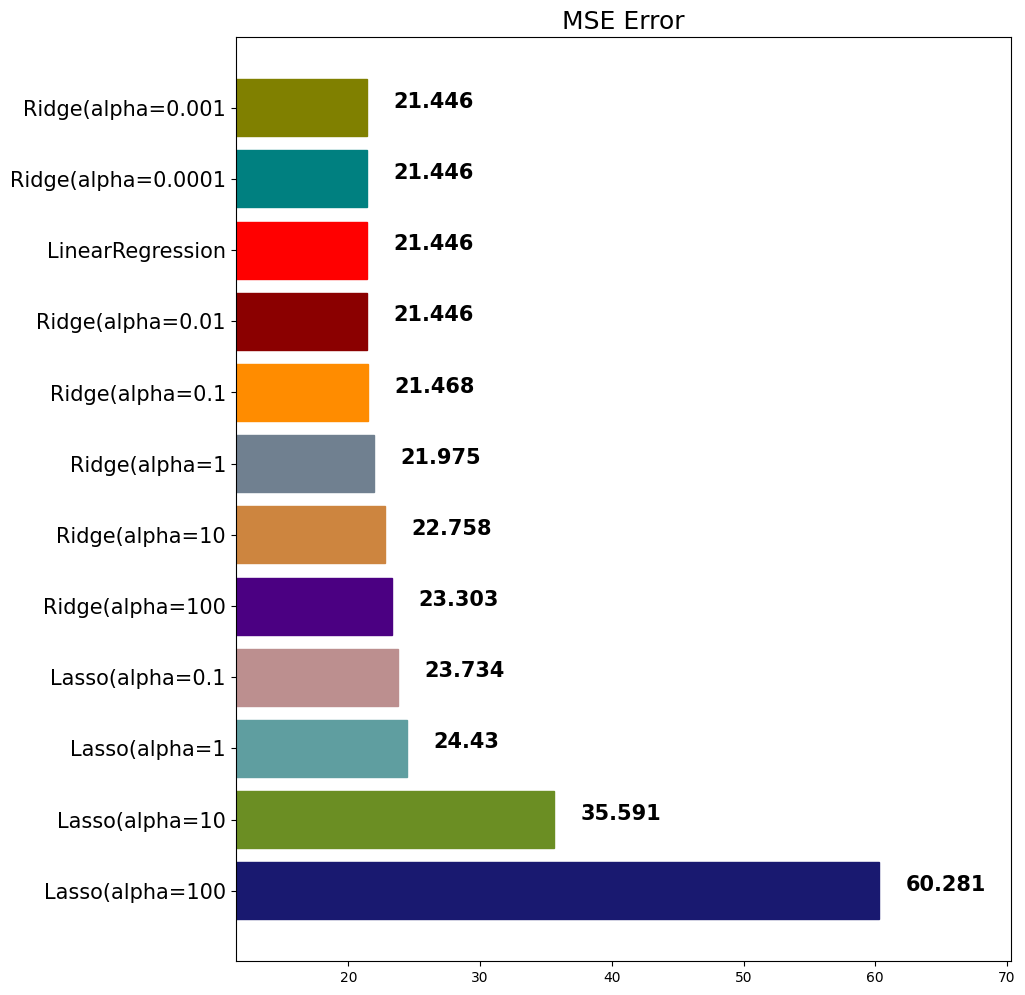

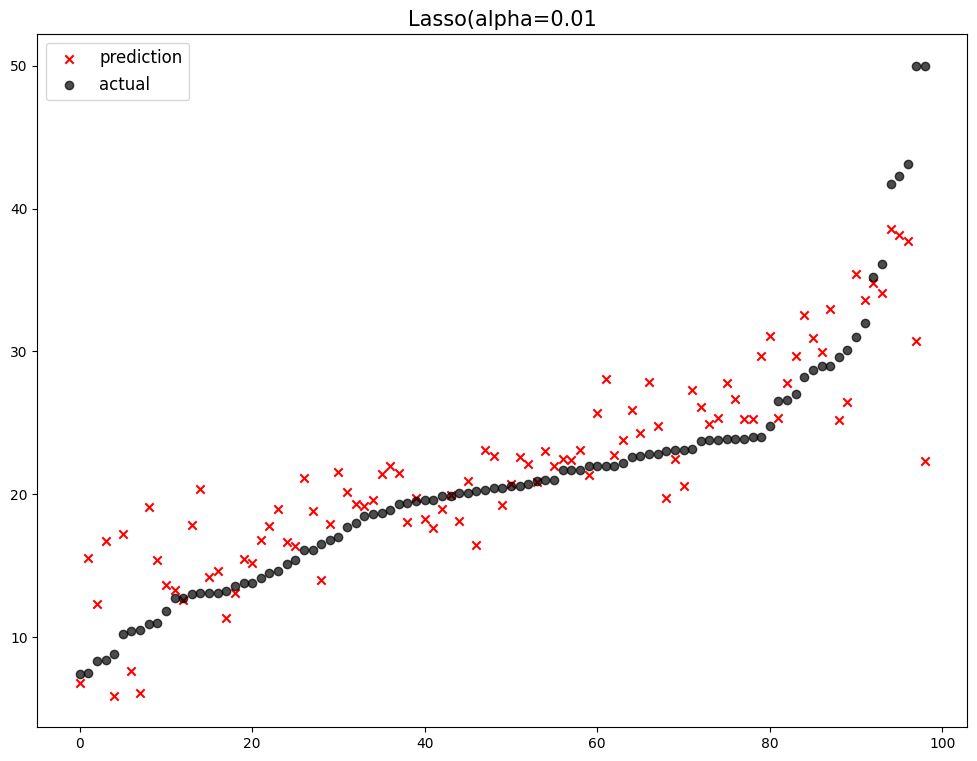

                 model        mse
0      Lasso(alpha=100  60.281090
1       Lasso(alpha=10  35.591429
2        Lasso(alpha=1  24.430407
3      Lasso(alpha=0.1  23.734392
4      Ridge(alpha=100  23.302588
5       Ridge(alpha=10  22.757505
6        Ridge(alpha=1  21.975229
7     Lasso(alpha=0.01  21.640552
8      Ridge(alpha=0.1  21.467921
9     Ridge(alpha=0.01  21.446143
10    LinearRegression  21.446034
11  Ridge(alpha=0.0001  21.446032
12   Ridge(alpha=0.001  21.446018


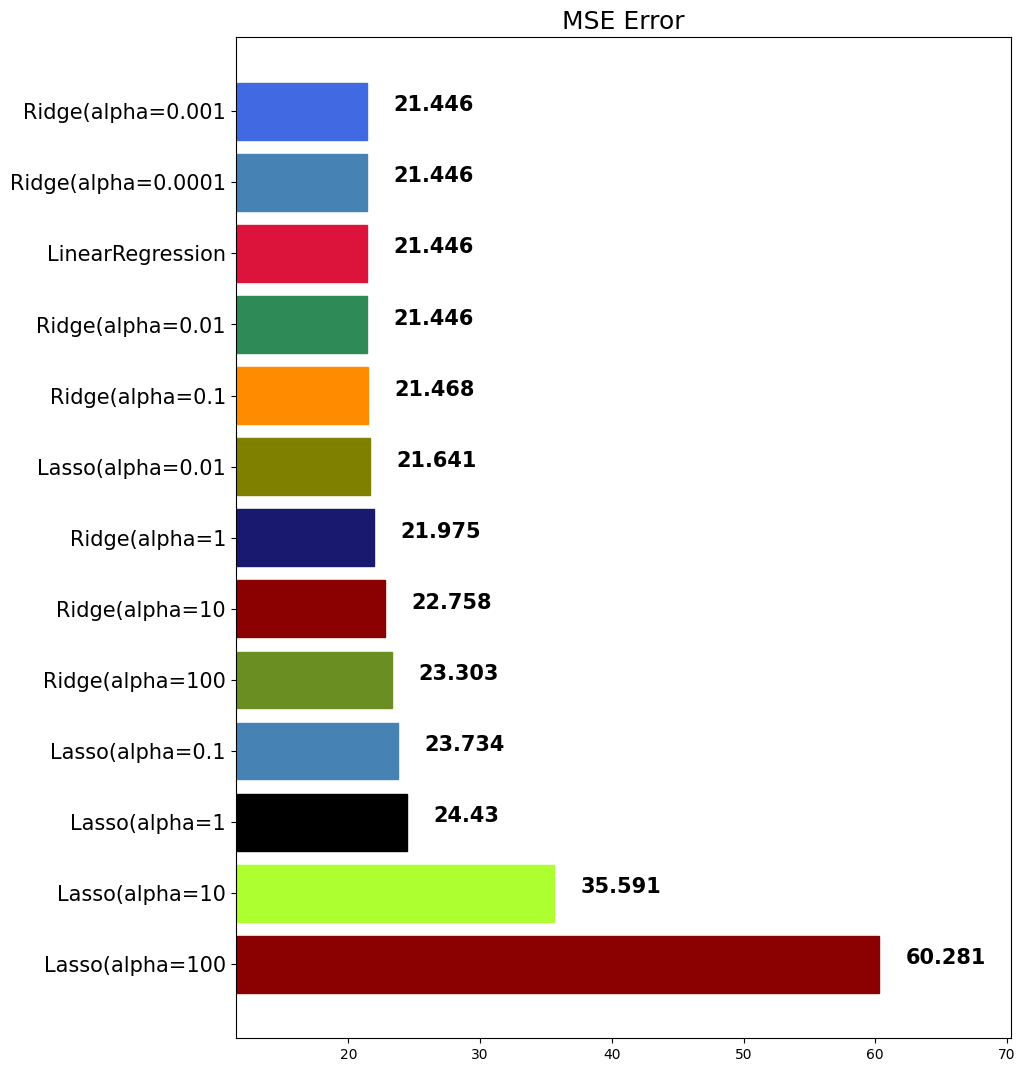

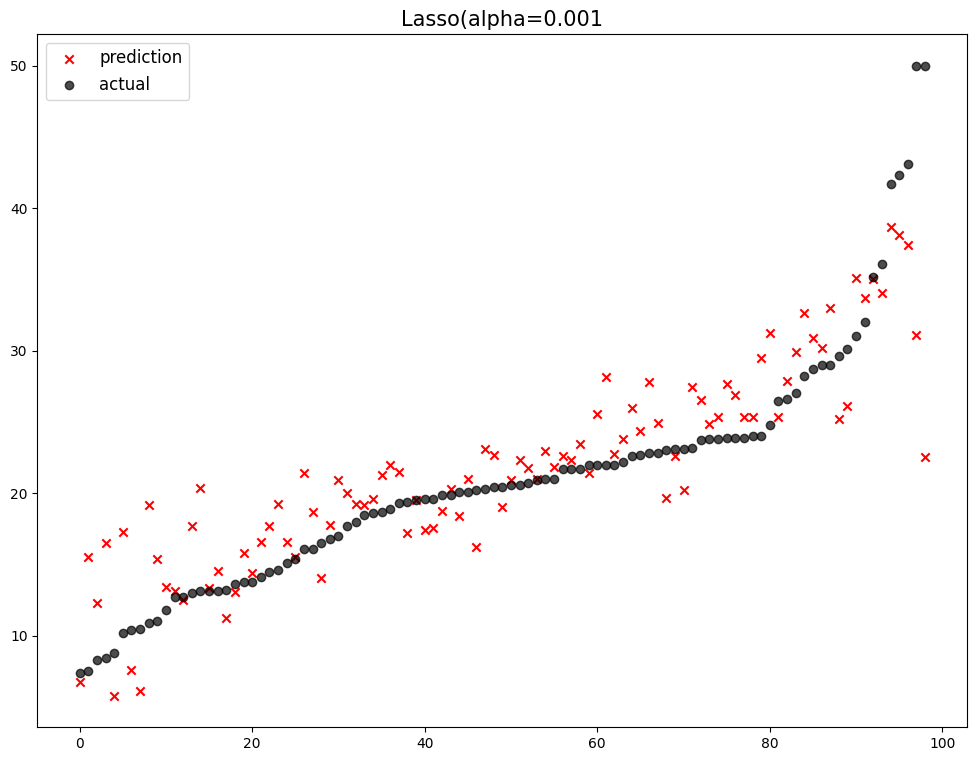

                 model        mse
0      Lasso(alpha=100  60.281090
1       Lasso(alpha=10  35.591429
2        Lasso(alpha=1  24.430407
3      Lasso(alpha=0.1  23.734392
4      Ridge(alpha=100  23.302588
5       Ridge(alpha=10  22.757505
6        Ridge(alpha=1  21.975229
7     Lasso(alpha=0.01  21.640552
8      Ridge(alpha=0.1  21.467921
9    Lasso(alpha=0.001  21.458066
10    Ridge(alpha=0.01  21.446143
11    LinearRegression  21.446034
12  Ridge(alpha=0.0001  21.446032
13   Ridge(alpha=0.001  21.446018


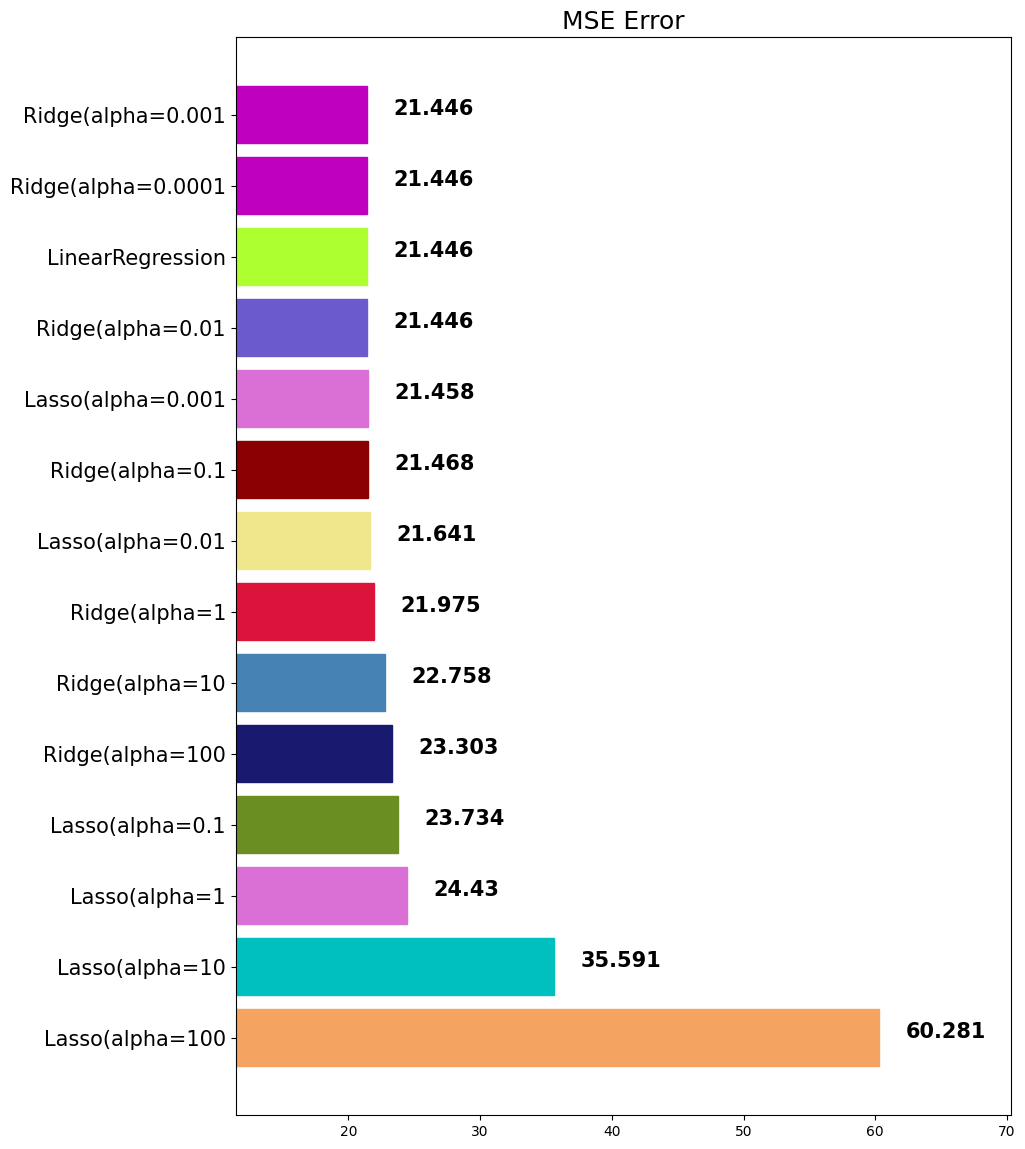

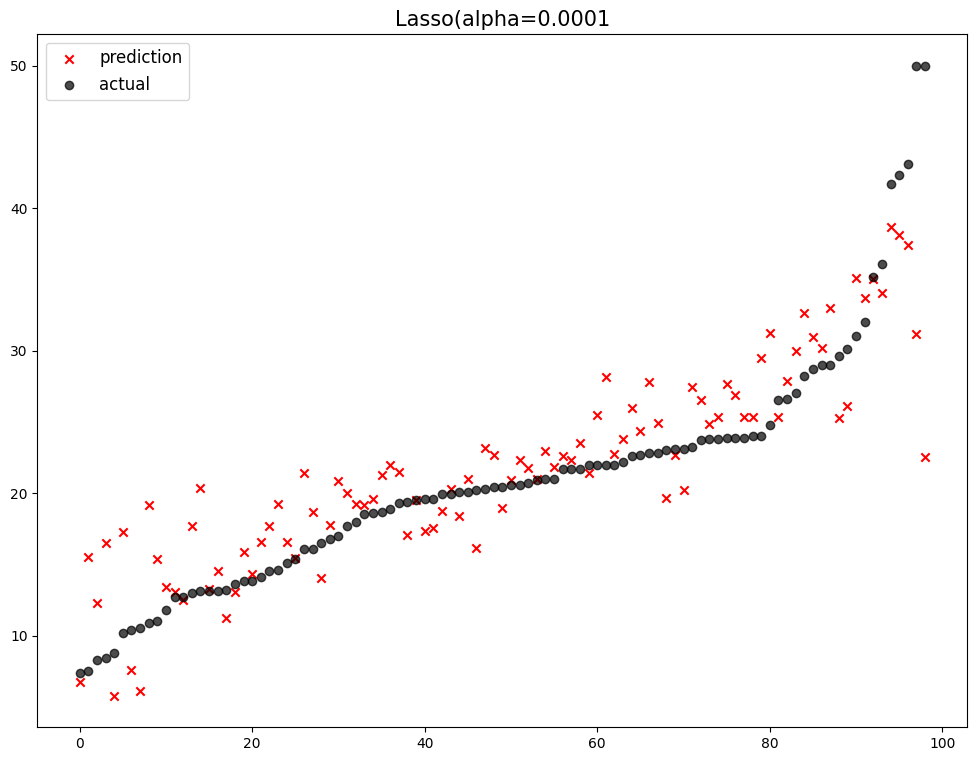

                 model        mse
0      Lasso(alpha=100  60.281090
1       Lasso(alpha=10  35.591429
2        Lasso(alpha=1  24.430407
3      Lasso(alpha=0.1  23.734392
4      Ridge(alpha=100  23.302588
5       Ridge(alpha=10  22.757505
6        Ridge(alpha=1  21.975229
7     Lasso(alpha=0.01  21.640552
8      Ridge(alpha=0.1  21.467921
9    Lasso(alpha=0.001  21.458066
10  Lasso(alpha=0.0001  21.447162
11    Ridge(alpha=0.01  21.446143
12    LinearRegression  21.446034
13  Ridge(alpha=0.0001  21.446032
14   Ridge(alpha=0.001  21.446018


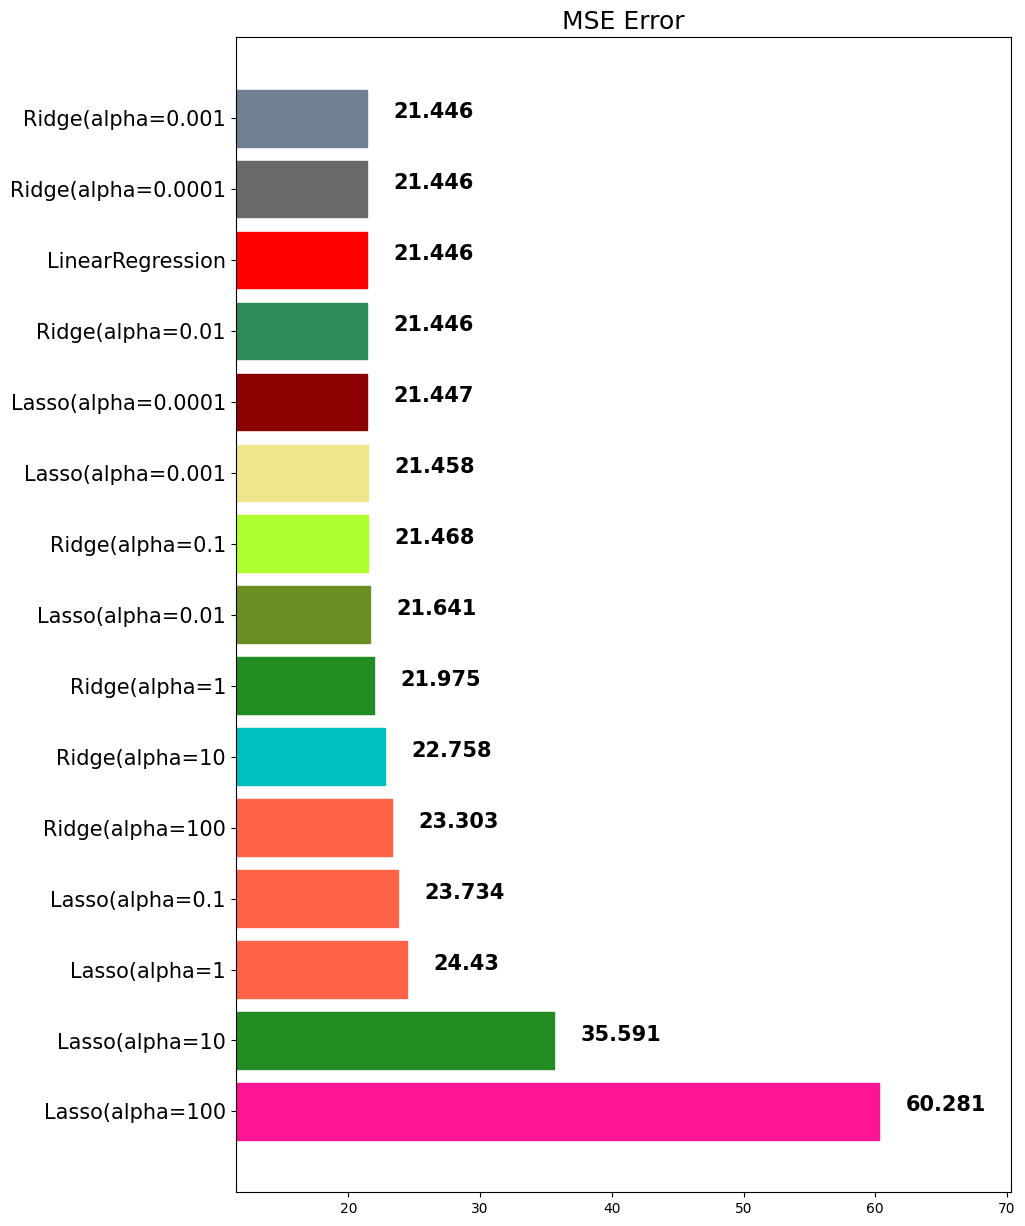

In [40]:
for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(x_train, y_train)
  pred = lasso.predict(x_test)
  mse_eval('Lasso(alpha={}'.format(alpha), pred, y_test)

In [41]:
# lasso coef 로 파악

In [42]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

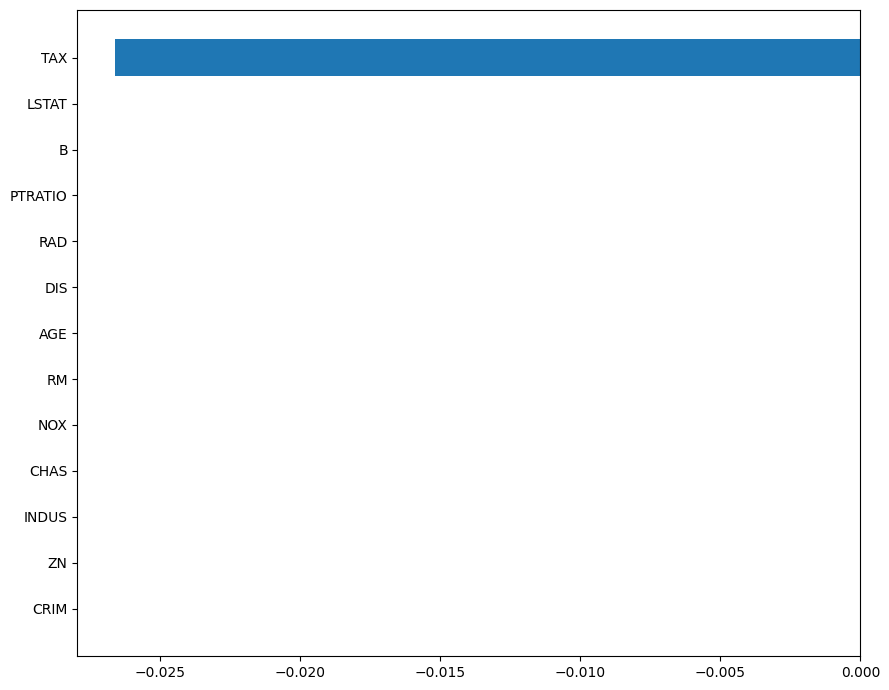

In [43]:
plot_coef(x_train.columns, lasso_100.coef_)

In [44]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02661064,
       -0.        ,  0.        , -0.        ])

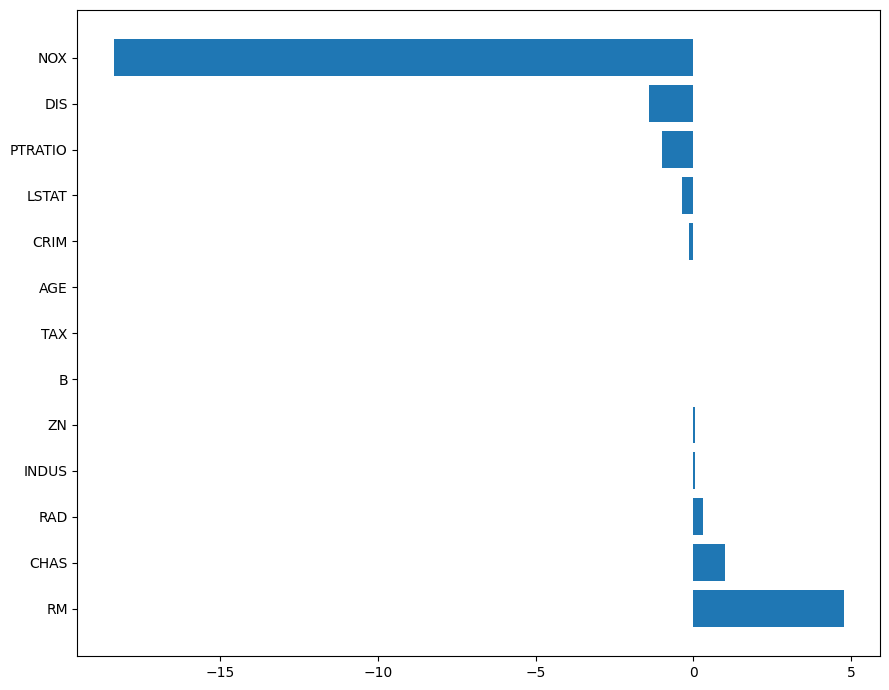

In [45]:
plot_coef(x_train.columns, lasso_001.coef_)

In [46]:
lasso_001.coef_

array([ -0.11922853,   0.04335067,   0.04761797,   1.00875329,
       -18.37656028,   4.76842794,  -0.01752649,  -1.38696548,
         0.30488313,  -0.01400159,  -1.00148584,   0.008712  ,
        -0.35404958])

5-3. ElasticNet
* l1_ratio = 0 (L2 규제만 사용)
* l1_ratio = 1 (L1 규제만 사용)
* 0 < l1_radio < 1 (L1 and L2 규제의 혼합사용)

In [47]:
from sklearn.linear_model import ElasticNet

In [48]:
ratios = [0.2, 0.5, 0.8]

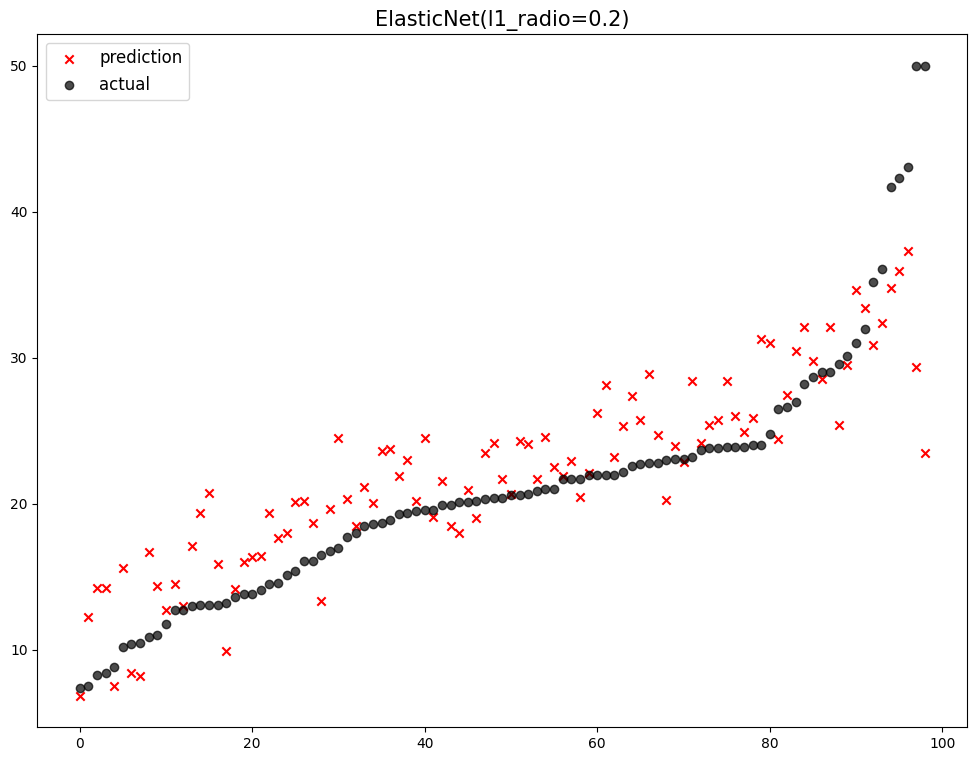

                       model        mse
0            Lasso(alpha=100  60.281090
1             Lasso(alpha=10  35.591429
2              Lasso(alpha=1  24.430407
3   ElasticNet(l1_radio=0.2)  23.745407
4            Lasso(alpha=0.1  23.734392
5            Ridge(alpha=100  23.302588
6             Ridge(alpha=10  22.757505
7              Ridge(alpha=1  21.975229
8           Lasso(alpha=0.01  21.640552
9            Ridge(alpha=0.1  21.467921
10         Lasso(alpha=0.001  21.458066
11        Lasso(alpha=0.0001  21.447162
12          Ridge(alpha=0.01  21.446143
13          LinearRegression  21.446034
14        Ridge(alpha=0.0001  21.446032
15         Ridge(alpha=0.001  21.446018


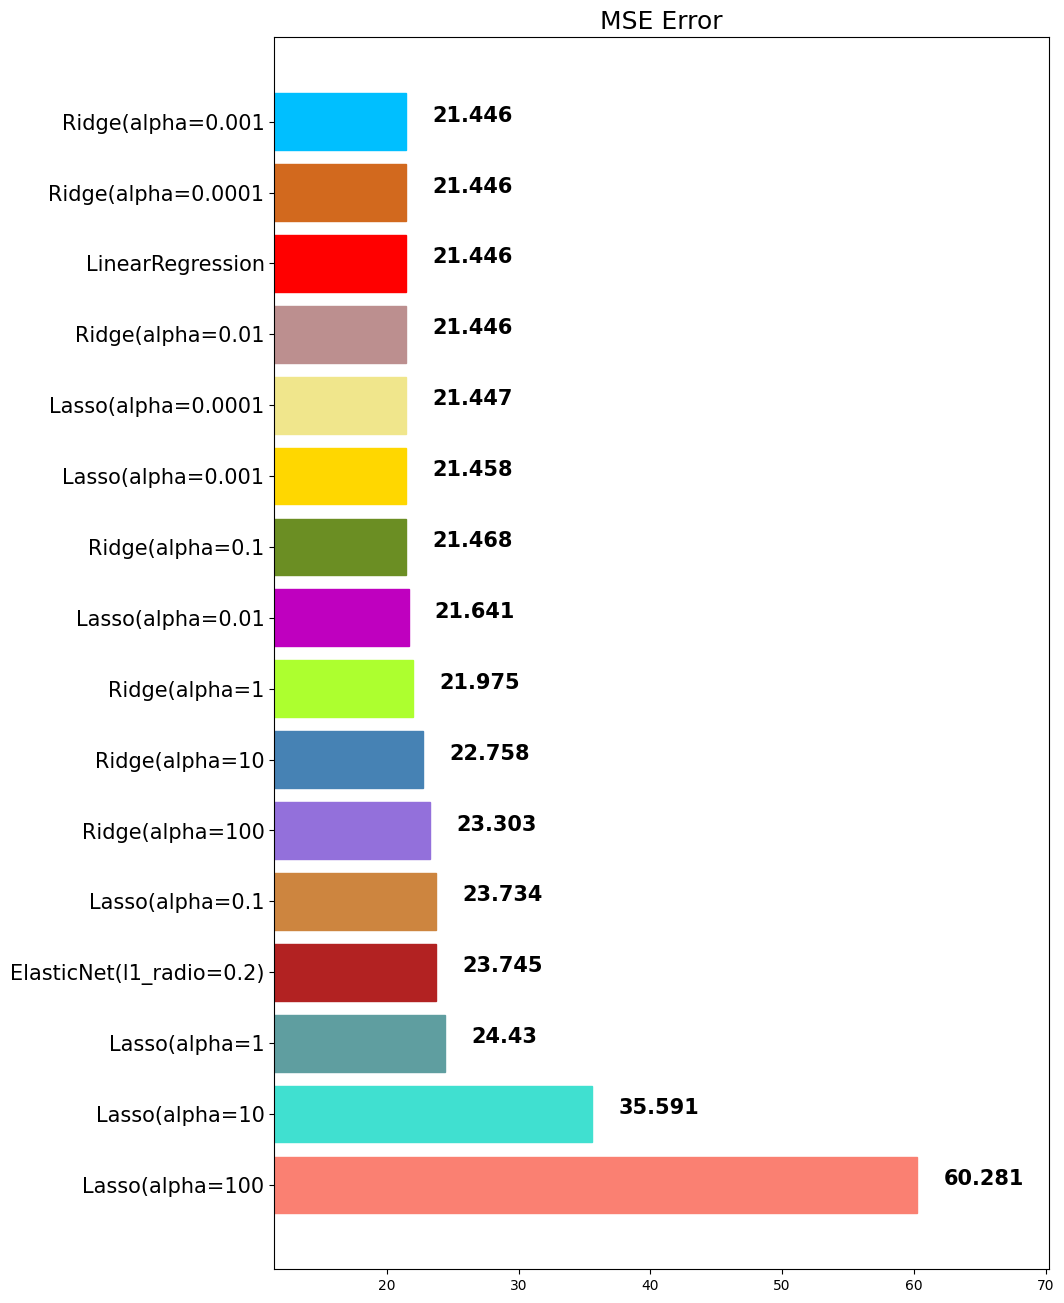

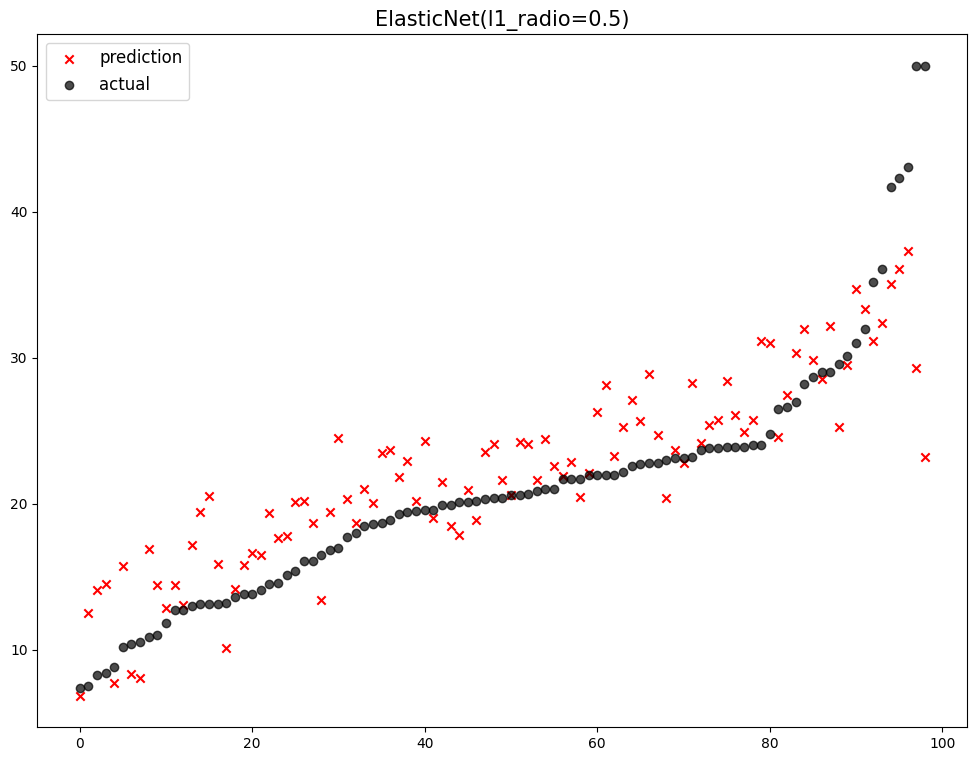

                       model        mse
0            Lasso(alpha=100  60.281090
1             Lasso(alpha=10  35.591429
2              Lasso(alpha=1  24.430407
3   ElasticNet(l1_radio=0.2)  23.745407
4            Lasso(alpha=0.1  23.734392
5   ElasticNet(l1_radio=0.5)  23.672984
6            Ridge(alpha=100  23.302588
7             Ridge(alpha=10  22.757505
8              Ridge(alpha=1  21.975229
9           Lasso(alpha=0.01  21.640552
10           Ridge(alpha=0.1  21.467921
11         Lasso(alpha=0.001  21.458066
12        Lasso(alpha=0.0001  21.447162
13          Ridge(alpha=0.01  21.446143
14          LinearRegression  21.446034
15        Ridge(alpha=0.0001  21.446032
16         Ridge(alpha=0.001  21.446018


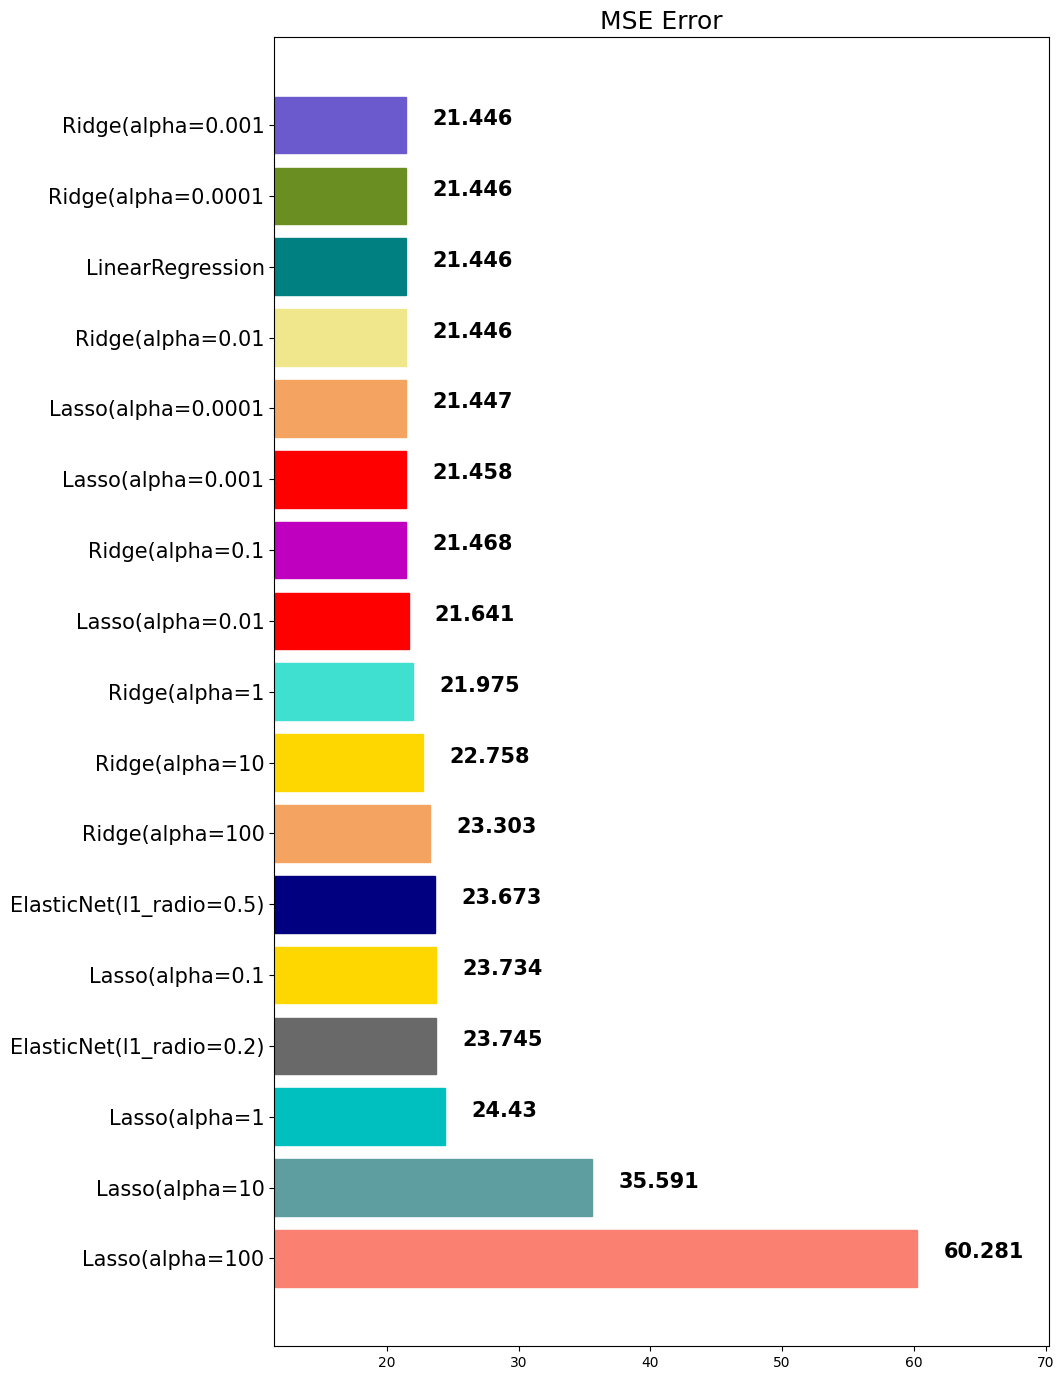

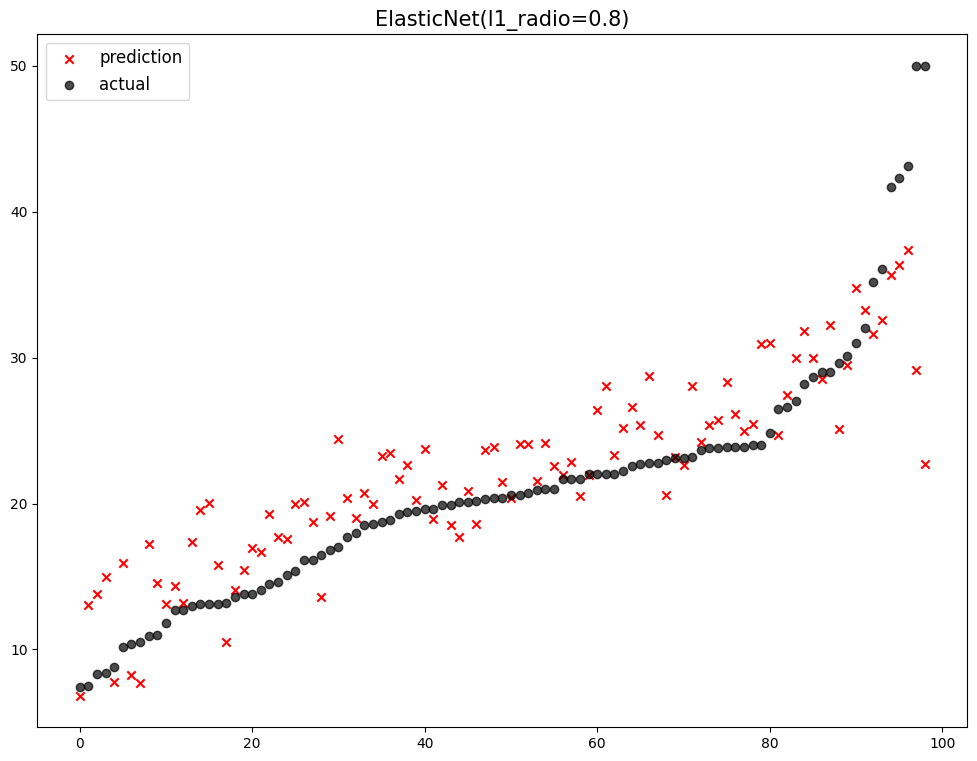

                       model        mse
0            Lasso(alpha=100  60.281090
1             Lasso(alpha=10  35.591429
2              Lasso(alpha=1  24.430407
3   ElasticNet(l1_radio=0.2)  23.745407
4            Lasso(alpha=0.1  23.734392
5   ElasticNet(l1_radio=0.5)  23.672984
6   ElasticNet(l1_radio=0.8)  23.558752
7            Ridge(alpha=100  23.302588
8             Ridge(alpha=10  22.757505
9              Ridge(alpha=1  21.975229
10          Lasso(alpha=0.01  21.640552
11           Ridge(alpha=0.1  21.467921
12         Lasso(alpha=0.001  21.458066
13        Lasso(alpha=0.0001  21.447162
14          Ridge(alpha=0.01  21.446143
15          LinearRegression  21.446034
16        Ridge(alpha=0.0001  21.446032
17         Ridge(alpha=0.001  21.446018


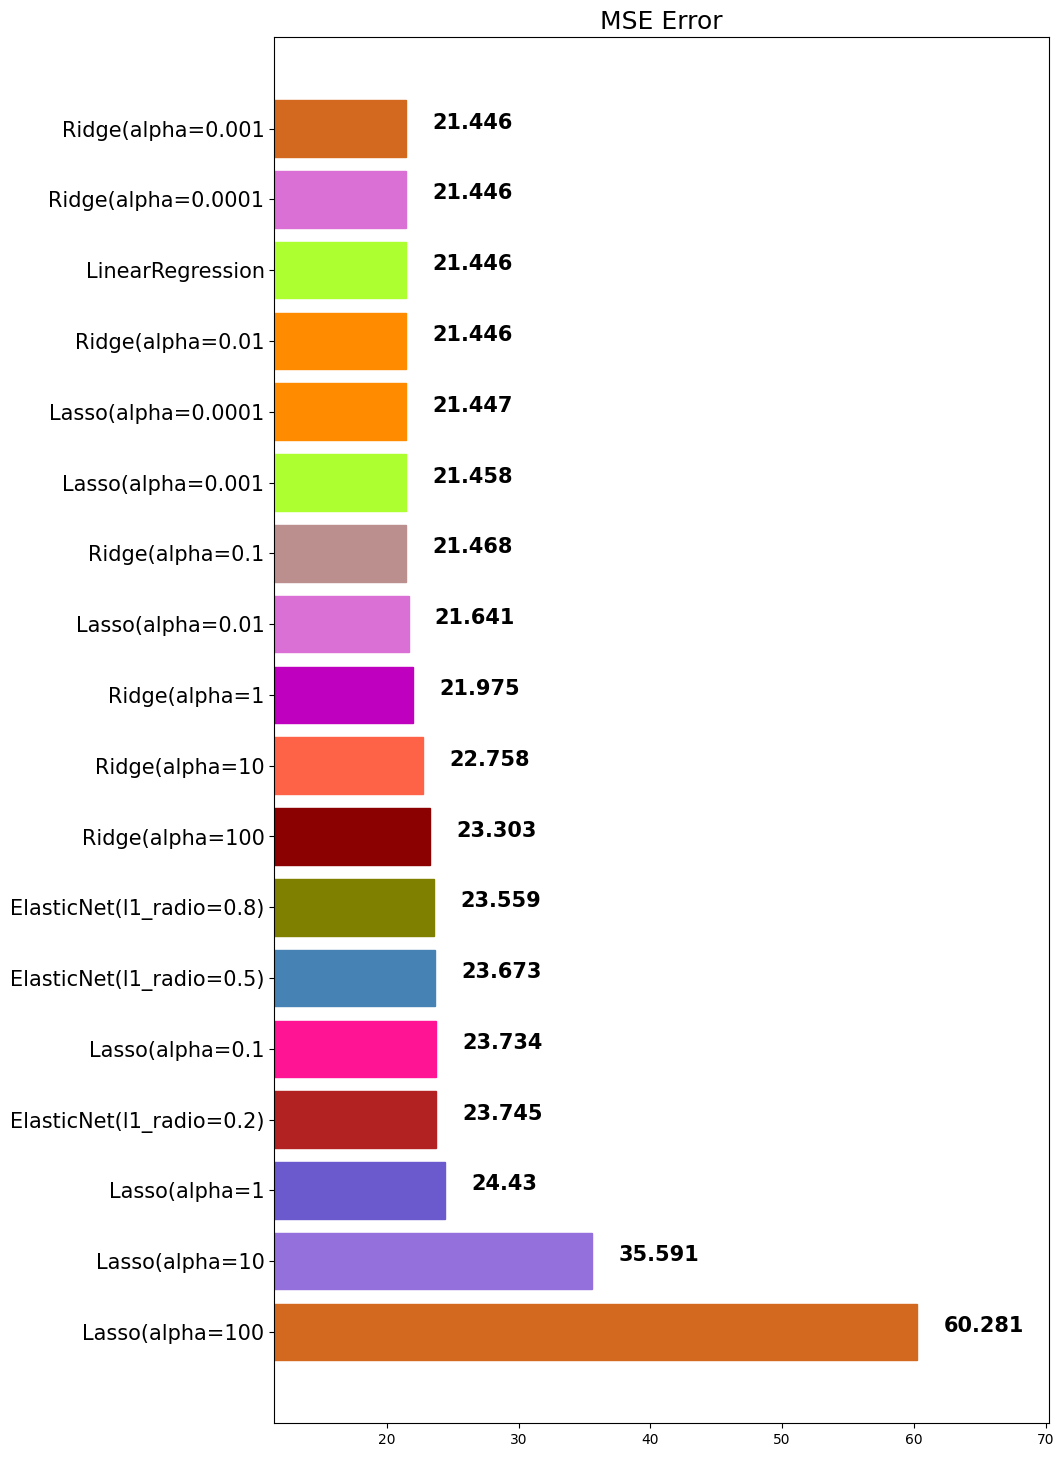

In [49]:
for ratio in ratios:
  elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
  elasticnet.fit(x_train, y_train)
  pred = elasticnet.predict(x_test)
  mse_eval('ElasticNet(l1_radio={})'.format(ratio), pred, y_test)

In [50]:
elasticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elasticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elasticnet_20.predict(x_test)

elasticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elasticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elasticnet_80.predict(x_test)

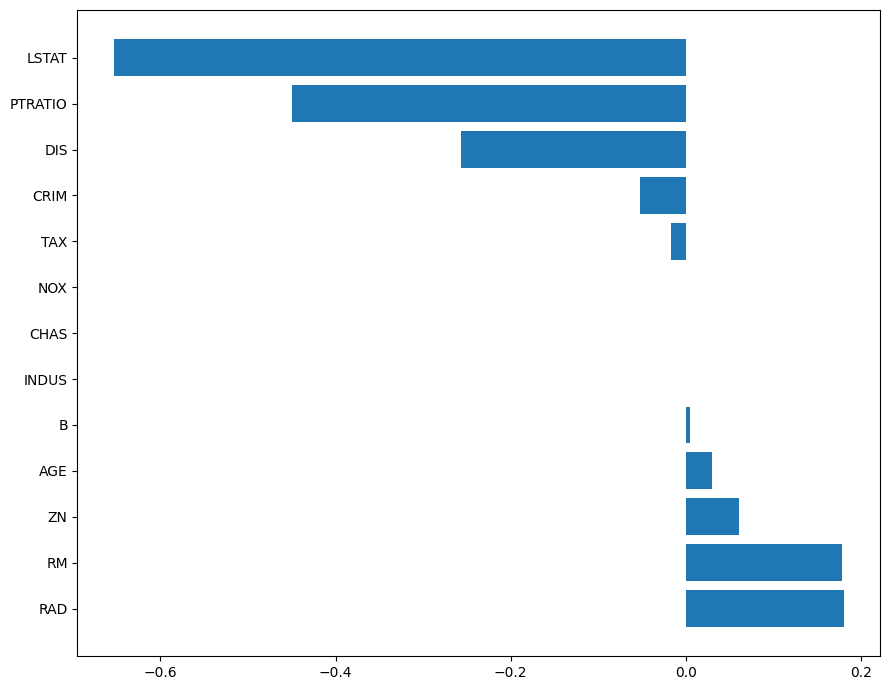

In [51]:
plot_coef(x_train.columns, elasticnet_20.coef_)

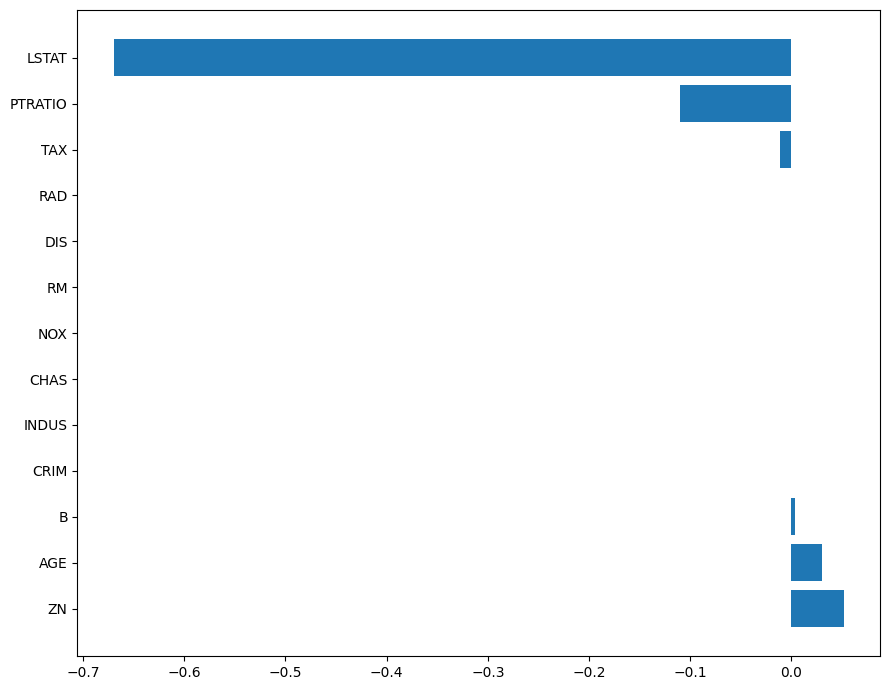

In [52]:
plot_coef(x_train.columns, elasticnet_80.coef_)

In [53]:
# 여기서부터 아래는 23.06.17 분량

# 6. **Scaler**

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [64]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,3.568547,12.776271,10.813797,0.064407,0.545654,6.299203,67.935593,3.885780,9.128814,403.915254,18.499661,363.438508,12.681831
std,9.248593,25.346492,6.981585,0.245893,0.109588,0.732547,28.531276,2.159218,8.503522,167.499222,2.138146,82.149477,7.480901
min,0.009060,0.000000,0.460000,0.000000,0.392000,3.561000,2.900000,1.137000,1.000000,188.000000,12.600000,2.600000,1.730000
25%,0.079180,0.000000,4.930000,0.000000,0.447000,5.886000,42.400000,2.110300,4.000000,277.000000,17.400000,377.375000,6.720000
50%,0.224380,0.000000,8.560000,0.000000,0.532000,6.226000,76.900000,3.215700,5.000000,330.000000,19.100000,392.430000,11.100000
75%,2.707610,20.000000,18.100000,0.000000,0.614000,6.622000,94.300000,5.344000,8.000000,666.000000,20.200000,396.900000,17.025000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### **6-1. StandardScaler**
* 평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [55]:
std_scaler = StandardScaler()

In [56]:
std_scaled = std_scaler.fit_transform(x_train)

In [57]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00
mean,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.39,-0.50,-1.49,-0.26,-1.40,-3.74,-2.28,-1.28,-0.96,-1.29,-2.76,-4.40,-1.47
25%,-0.38,-0.50,-0.84,-0.26,-0.90,-0.57,-0.90,-0.82,-0.60,-0.76,-0.52,0.17,-0.80
50%,-0.36,-0.50,-0.32,-0.26,-0.12,-0.10,0.31,-0.31,-0.49,-0.44,0.28,0.35,-0.21
75%,-0.09,0.29,1.05,-0.26,0.62,0.44,0.93,0.68,-0.13,1.57,0.80,0.41,0.58
max,9.25,3.45,2.43,3.81,2.97,3.39,1.13,3.17,1.75,1.84,1.64,0.41,3.39


### **6-2. MinMaxScaler**
* min값과 max값을 0~1사이로 정규화

In [58]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [59]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00,295.00
mean,0.04,0.13,0.38,0.06,0.32,0.52,0.67,0.29,0.35,0.41,0.63,0.92,0.30
std,0.10,0.25,0.26,0.25,0.23,0.14,0.29,0.23,0.37,0.32,0.23,0.21,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.16,0.00,0.11,0.45,0.41,0.10,0.13,0.17,0.51,0.95,0.14
50%,0.00,0.00,0.30,0.00,0.29,0.51,0.76,0.22,0.17,0.27,0.69,0.99,0.26
75%,0.03,0.20,0.65,0.00,0.46,0.59,0.94,0.44,0.30,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### **6-3. RobustScaler**
* 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환
* outlier 값 처리에 유용

In [ ]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [ ]:
round(pd.DataFrame(robust_scaled).median(), 2)

# **7. 파이프라인**

* [velog-사이킷런-파이프라인](https://velog.io/@ljs7463/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-%ED%8C%8C%EC%9D%B4%ED%94%84%EB%9D%BC%EC%9D%B8Pipelines)

In [60]:
from sklearn.pipeline import make_pipeline

In [61]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [ ]:
# model = elasticnet_pipeline.fit(x_train, y_train)
# prediction = model.predict

In [62]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

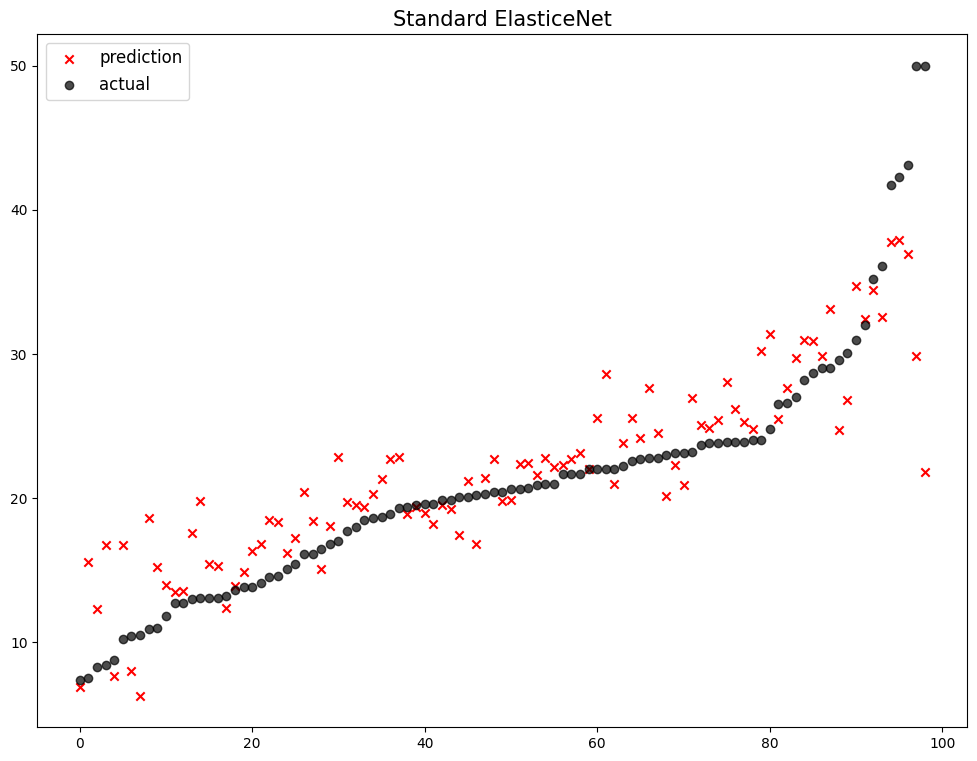

                       model        mse
0            Lasso(alpha=100  60.281090
1             Lasso(alpha=10  35.591429
2              Lasso(alpha=1  24.430407
3   ElasticNet(l1_radio=0.2)  23.745407
4            Lasso(alpha=0.1  23.734392
5   ElasticNet(l1_radio=0.5)  23.672984
6   ElasticNet(l1_radio=0.8)  23.558752
7            Ridge(alpha=100  23.302588
8             Ridge(alpha=10  22.757505
9       Standard ElasticeNet  22.120469
10             Ridge(alpha=1  21.975229
11          Lasso(alpha=0.01  21.640552
12           Ridge(alpha=0.1  21.467921
13         Lasso(alpha=0.001  21.458066
14        Lasso(alpha=0.0001  21.447162
15          Ridge(alpha=0.01  21.446143
16          LinearRegression  21.446034
17        Ridge(alpha=0.0001  21.446032
18         Ridge(alpha=0.001  21.446018


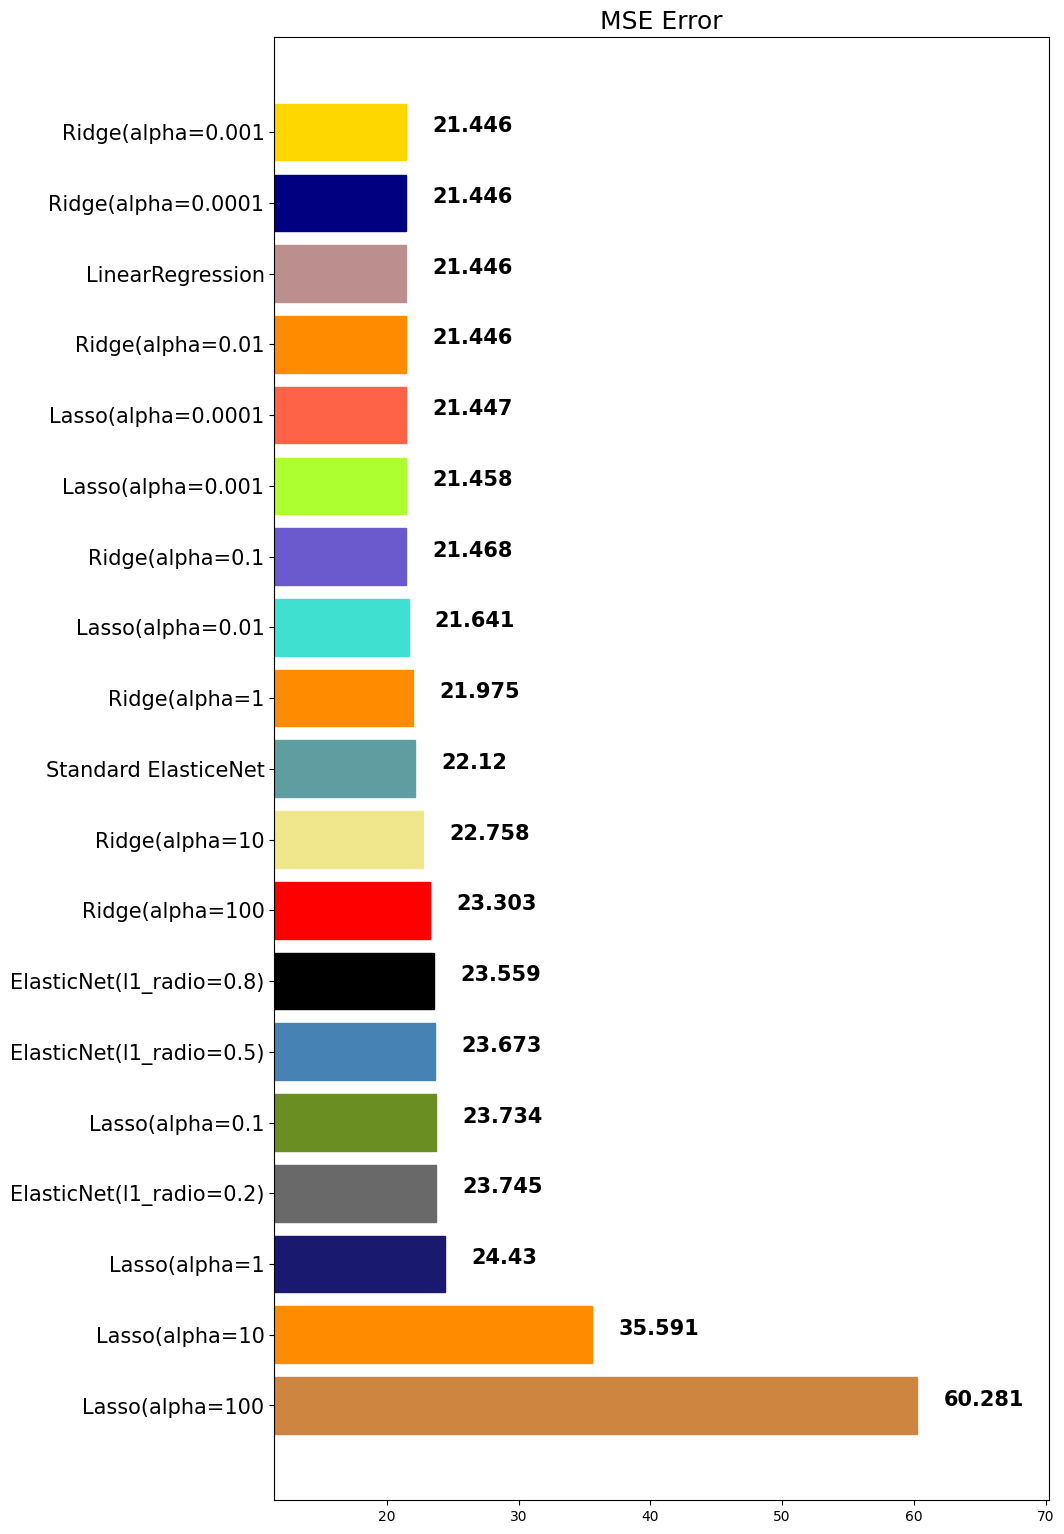

In [63]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

# **8. Polynomial Feature**

* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)
* 다항식의 계수간 상호작용을 통해 새로운 feature를 생성
* [a, b] 2개의 feature가 존재할 때 degree=2로 설정하면 polynomial features 는 [1, a, b, a^2, ab, b^2]가 됨

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
poly = PolynomialFeatures(degree=2, include_bias=False) # include_bias 옵션은 True로 할 경우 0차항(1)도 함께 만든다.

In [69]:
poly_features = poly.fit_transform(x_train)[0]

In [70]:
poly_features

array([     0.22212   ,      0.        ,     10.01      ,      0.        ,
            0.547     ,      6.092     ,     95.4       ,      2.548     ,
            6.        ,    432.        ,     17.8       ,    396.9       ,
           17.09      ,      0.04933729,      0.        ,      2.2234212 ,
            0.        ,      0.12149964,      1.35315504,     21.190248  ,
            0.56596176,      1.33272   ,     95.95584   ,      3.953736  ,
           88.159428  ,      3.7960308 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,    100.2001    ,      0.        ,
            5.47547   ,     60.98092   ,    954.954     ,     25.50548   ,
           60.06      ,   4324.32      ,    178.178     ,   3972.969     ,
          171.0709    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [71]:
x_train.iloc[0]

CRIM         0.22212
ZN           0.00000
INDUS       10.01000
CHAS         0.00000
NOX          0.54700
RM           6.09200
AGE         95.40000
DIS          2.54800
RAD          6.00000
TAX        432.00000
PTRATIO     17.80000
B          396.90000
LSTAT       17.09000
Name: 113, dtype: float64

In [72]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [73]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.288e+01, tolerance: 2.586e+00
  model = cd_fast.enet_coordinate_descent(


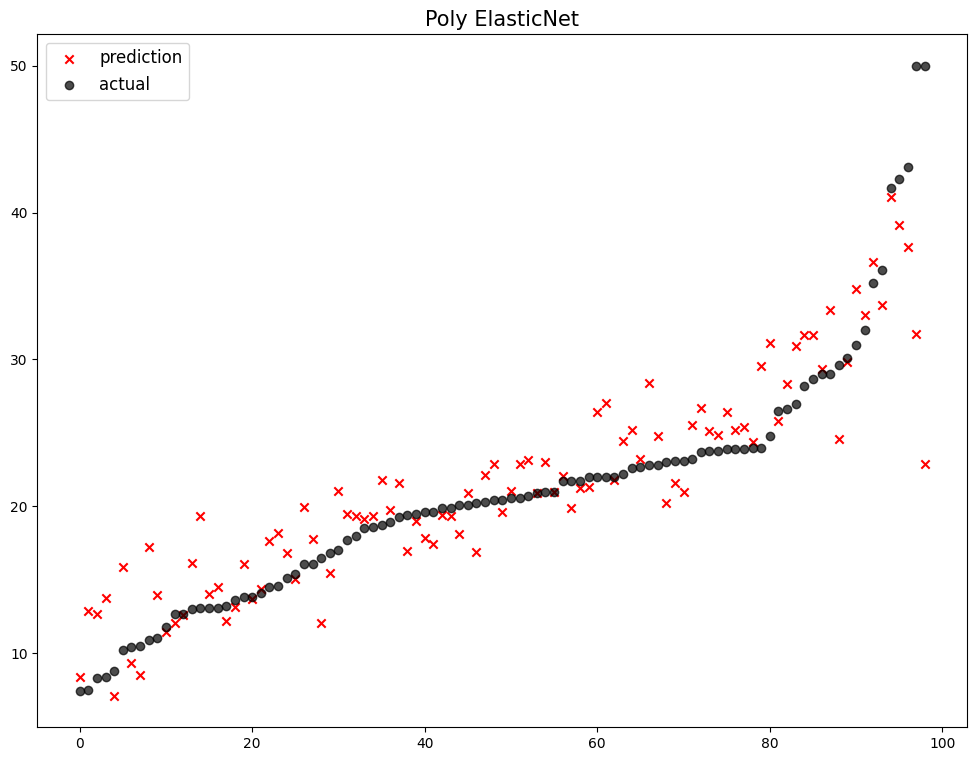

                       model        mse
0            Lasso(alpha=100  60.281090
1             Lasso(alpha=10  35.591429
2              Lasso(alpha=1  24.430407
3   ElasticNet(l1_radio=0.2)  23.745407
4            Lasso(alpha=0.1  23.734392
5   ElasticNet(l1_radio=0.5)  23.672984
6   ElasticNet(l1_radio=0.8)  23.558752
7            Ridge(alpha=100  23.302588
8             Ridge(alpha=10  22.757505
9       Standard ElasticeNet  22.120469
10             Ridge(alpha=1  21.975229
11          Lasso(alpha=0.01  21.640552
12           Ridge(alpha=0.1  21.467921
13         Lasso(alpha=0.001  21.458066
14        Lasso(alpha=0.0001  21.447162
15          Ridge(alpha=0.01  21.446143
16          LinearRegression  21.446034
17        Ridge(alpha=0.0001  21.446032
18         Ridge(alpha=0.001  21.446018
19           Poly ElasticNet  18.277333


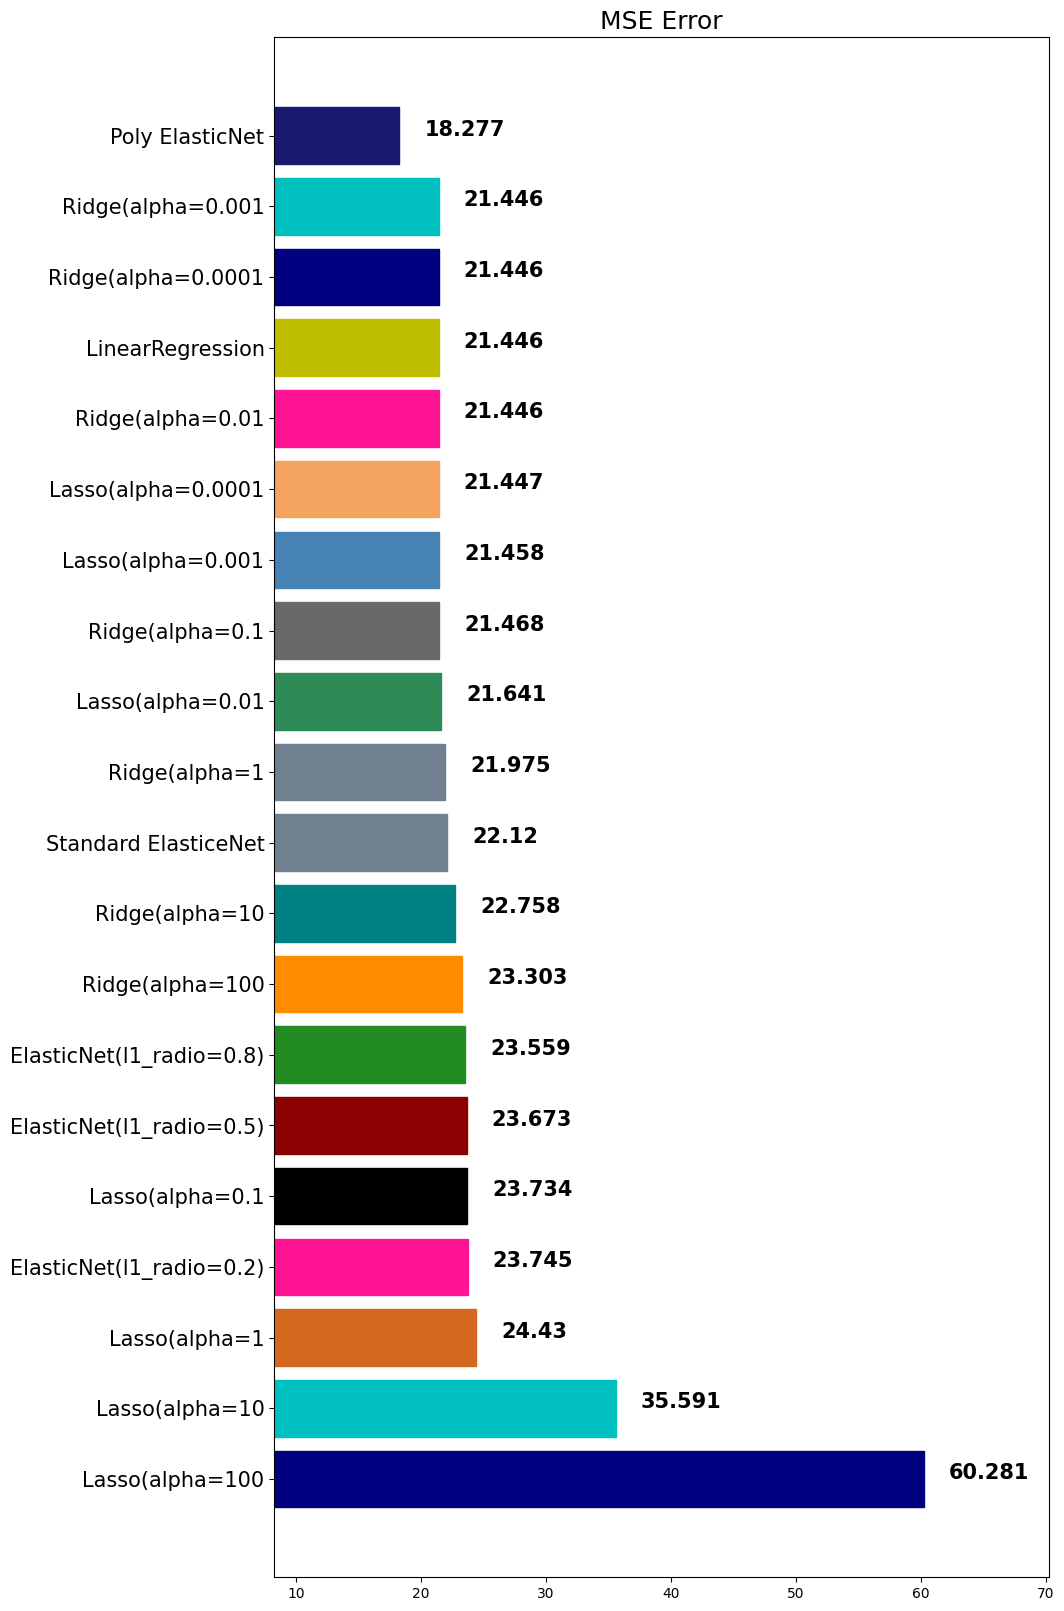

In [74]:
mse_eval('Poly ElasticNet', poly_pred, y_test)